In [0]:
!pip install kaggle
!kaggle
with open("/root/.kaggle/kaggle.json","w") as fp:
  info = '{"username":"shashankmanurao","key":"52eb38fb5caedc18eda01c110d1022db"}'
  fp.write(info)
!kaggle competitions download -c home-credit-default-risk

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
 82% 89.0M/109M [00:02<00:00, 22.8MB/s]
100% 109M/109M [00:02<00:00, 42.7MB/s] 
 91% 33.0M/36.1M [00:01<00:00, 16.6MB/s]
100% 36.1M/36.1M [00:01<00:00, 31.1MB/s]
 86% 5.00M/5.81M [00:00<00:00, 24.2MB/s]
100% 5.81M/5.81M [00:00<00:00, 23.0MB/s]
 90% 33.0M/36.8M [00:00<00:00, 25.3MB/s]
100% 36.8M/36.8M [00:00<00:00, 44.5MB/s]
 98% 266M/271M [00:06<00:00, 45.9MB/s]
100% 271M/271M [00:06<00:00, 46.7MB/s]
 86% 49.0M/56.8M [00:01<00:00, 37.0MB/s]
100% 56.8M/56.8M [00:01<00:00, 47.0MB/s]
  0% 0.00/524k [00:00<?, 

In [0]:
! ls

application_test.csv.zip     HomeCredit_columns_description.csv
application_train.csv.zip    installments_payments.csv.zip
bureau_balance.csv.zip	     POS_CASH_balance.csv.zip
bureau.csv.zip		     previous_application.csv.zip
credit_card_balance.csv.zip  sample_data
drive			     sample_submission.csv


In [0]:
!unzip application_train.csv.zip
!unzip bureau_balance.csv.zip
!unzip bureau.csv.zip
!unzip credit_card_balance.csv.zip
!unzip installments_payments.csv.zip
!unzip POS_CASH_balance.csv.zip
!unzip previous_application.csv.zip

Archive:  application_train.csv.zip
  inflating: application_train.csv   
Archive:  bureau_balance.csv.zip
  inflating: bureau_balance.csv      
Archive:  bureau.csv.zip
  inflating: bureau.csv              
Archive:  credit_card_balance.csv.zip
  inflating: credit_card_balance.csv  
Archive:  installments_payments.csv.zip
  inflating: installments_payments.csv  
Archive:  POS_CASH_balance.csv.zip
  inflating: POS_CASH_balance.csv    
Archive:  previous_application.csv.zip
  inflating: previous_application.csv  


In [0]:
import numpy as np
import pandas as pd 
import gc
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:


# Read in the full datasets
app = pd.read_csv('application_train.csv')
bureau = pd.read_csv('bureau.csv')
bureau_balance = pd.read_csv('bureau_balance.csv')
cash = pd.read_csv('POS_CASH_balance.csv')
credit = pd.read_csv('credit_card_balance.csv')
previous = pd.read_csv('previous_application.csv')
installments = pd.read_csv('installments_payments.csv')

print('Read data')

Read data


In [0]:
app['SK_ID_CURR']=app['SK_ID_CURR'].astype('str')
bureau[['SK_ID_CURR','SK_ID_BUREAU']]=bureau[['SK_ID_CURR','SK_ID_BUREAU']].astype('str')
bureau_balance['SK_ID_BUREAU']=bureau_balance['SK_ID_BUREAU'].astype('str')
cash[['SK_ID_PREV','SK_ID_CURR']]=cash[['SK_ID_PREV','SK_ID_CURR']].astype('str')
previous[['SK_ID_PREV','SK_ID_CURR']]=previous[['SK_ID_PREV','SK_ID_CURR']].astype('str')
credit[['SK_ID_PREV','SK_ID_CURR']]=credit[['SK_ID_PREV','SK_ID_CURR']].astype('str')
installments[['SK_ID_PREV','SK_ID_CURR']]=installments[['SK_ID_PREV','SK_ID_CURR']].astype('str')

In [0]:
app.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
bureau.head()

,SK_ID_CURR,SK_ID_BUREAU,CREDIT_ACTIVE,CREDIT_CURRENCY,DAYS_CREDIT,CREDIT_DAY_OVERDUE,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,AMT_CREDIT_MAX_OVERDUE,CNT_CREDIT_PROLONG,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,CREDIT_TYPE,DAYS_CREDIT_UPDATE,AMT_ANNUITY
0,215354,5714462,Closed,currency 1,-497,0,-153.0,-153.0,NaN,0,91323.0,0.0,NaN,0.0,Consumer credit,-131,NaN
1,215354,5714463,Active,currency 1,-208,0,1075.0,NaN,NaN,0,225000.0,171342.0,NaN,0.0,Credit card,-20,NaN
2,215354,5714464,Active,currency 1,-203,0,528.0,NaN,NaN,0,464323.5,NaN,NaN,0.0,Consumer credit,-16,NaN
3,215354,5714465,Active,currency 1,-203,0,NaN,NaN,NaN,0,90000.0,NaN,NaN,0.0,Credit card,-16,NaN
4,215354,5714466,Active,currency 1,-629,0,1197.0,NaN,77674.5,0,2700000.0,NaN,NaN,0.0,Consumer credit,-21,NaN


In [0]:
bureau_balance.head()

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS
0,5715448,0,C
1,5715448,-1,C
2,5715448,-2,C
3,5715448,-3,C
4,5715448,-4,C


In [0]:
cash.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,CNT_INSTALMENT,CNT_INSTALMENT_FUTURE,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,1803195,182943,-31,48.0,45.0,Active,0,0
1,1715348,367990,-33,36.0,35.0,Active,0,0
2,1784872,397406,-32,12.0,9.0,Active,0,0
3,1903291,269225,-35,48.0,42.0,Active,0,0
4,2341044,334279,-35,36.0,35.0,Active,0,0


In [0]:
previous.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
credit.head()

,SK_ID_PREV,SK_ID_CURR,MONTHS_BALANCE,AMT_BALANCE,AMT_CREDIT_LIMIT_ACTUAL,AMT_DRAWINGS_ATM_CURRENT,AMT_DRAWINGS_CURRENT,AMT_DRAWINGS_OTHER_CURRENT,AMT_DRAWINGS_POS_CURRENT,AMT_INST_MIN_REGULARITY,AMT_PAYMENT_CURRENT,AMT_PAYMENT_TOTAL_CURRENT,AMT_RECEIVABLE_PRINCIPAL,AMT_RECIVABLE,AMT_TOTAL_RECEIVABLE,CNT_DRAWINGS_ATM_CURRENT,CNT_DRAWINGS_CURRENT,CNT_DRAWINGS_OTHER_CURRENT,CNT_DRAWINGS_POS_CURRENT,CNT_INSTALMENT_MATURE_CUM,NAME_CONTRACT_STATUS,SK_DPD,SK_DPD_DEF
0,2562384,378907,-6,56.970,135000,0.0,877.5,0.0,877.5,1700.325,1800.0,1800.0,0.000,0.000,0.000,0.0,1,0.0,1.0,35.0,Active,0,0
1,2582071,363914,-1,63975.555,45000,2250.0,2250.0,0.0,0.0,2250.000,2250.0,2250.0,60175.080,64875.555,64875.555,1.0,1,0.0,0.0,69.0,Active,0,0
2,1740877,371185,-7,31815.225,450000,0.0,0.0,0.0,0.0,2250.000,2250.0,2250.0,26926.425,31460.085,31460.085,0.0,0,0.0,0.0,30.0,Active,0,0
3,1389973,337855,-4,236572.110,225000,2250.0,2250.0,0.0,0.0,11795.760,11925.0,11925.0,224949.285,233048.970,233048.970,1.0,1,0.0,0.0,10.0,Active,0,0
4,1891521,126868,-1,453919.455,450000,0.0,11547.0,0.0,11547.0,22924.890,27000.0,27000.0,443044.395,453919.455,453919.455,0.0,1,0.0,1.0,101.0,Active,0,0


In [0]:
installments.head()

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.360,6948.360
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525,1716.525
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000,25425.000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130,24350.130
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040,2160.585


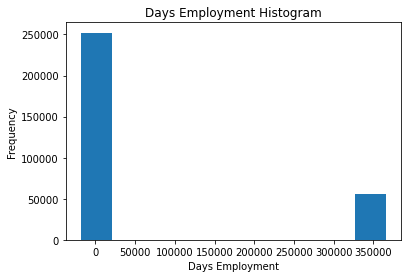

In [0]:
app['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

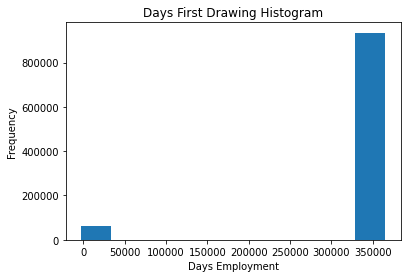

In [0]:
previous['DAYS_FIRST_DRAWING'].plot.hist(title = 'Days First Drawing Histogram');
plt.xlabel('Days Employment');

In [0]:
#Removing outliers
app=app.replace({365243: np.nan})
previous=previous.replace({365243: np.nan})

In [0]:
def missing(df, threshold = 50):
    # Calculate missing stats 
    miss = pd.DataFrame(df.isnull().sum())
    miss['percent'] = 100 * miss[0] / len(df)
        
    # list of missing columns
    missing_columns = (miss[miss['percent']>threshold])
    return missing_columns

In [0]:
missing(previous,threshold=90)

,0,percent
RATE_INTEREST_PRIMARY,1664263,99.643698
RATE_INTEREST_PRIVILEGED,1664263,99.643698
DAYS_FIRST_DRAWING,1607509,96.245691


In [0]:
previous=previous.drop(columns=["RATE_INTEREST_PRIMARY","RATE_INTEREST_PRIVILEGED","DAYS_FIRST_DRAWING"])

In [0]:
def agg2(df, parent_var, df_name):  
    
    # Remove id variables other than grouping variable
    for col in df.columns:
        if col != parent_var and 'SK_ID' in col:
            df = df.drop(columns = col)
    
    # Only want the numeric variables
    numeric_df = df.select_dtypes(include=['float','int','double']).copy()
    numeric_df[parent_var] = df[parent_var]
    # Group by the specified variable and calculate the statistics
    agg_df = numeric_df.groupby(parent_var).agg(['count', 'mean', 'max', 'min', 'sum'])
    
    columns = []

    # Iterate through the variables names
    for var in agg_df.columns.levels[0]:
        if var != parent_var:
            # Iterate through the stat names
            for stat in agg_df.columns.levels[1]:
                # Make a new column name for the variable and stat
                columns.append('%s_%s_%s' % (df_name, var, stat))
    
    agg_df.columns = columns
    # Select the categorical columns
    catdata = df.select_dtypes(['category','object','bool'])
    if parent_var in catdata.columns:
        catdata=catdata.drop(columns = parent_var)
    
    if catdata.shape[1] != 0:
        
        categorical = pd.get_dummies(catdata)
        
        # Make sure to put the identifying id on the column
        categorical[parent_var] = df[parent_var]
        
        # Groupby the group var and calculate the sum and mean
        categorical = categorical.groupby(parent_var).agg(['sum', 'count', 'mean'])
        
        column_names = []
    
        # Iterate through the columns in level 0
        for var1 in categorical.columns.levels[0]:
            if var1 != parent_var:
                # Iterate through the stats in level 1
                for stat1 in ['sum', 'count', 'mean']:
                    # Make a new column name
                    column_names.append('%s_%s_%s' % (df_name, var1, stat1))
        categorical.columns=column_names
        # Merge on the parent variable
        agg_df1 = agg_df.merge(categorical, on=parent_var, how = 'outer')
    else:
        agg_df1=agg_df   
    
    # Remove the columns with all redundant values
    _, idx = np.unique(agg_df1, axis = 1, return_index=True)
    agg_df1 = agg_df1.iloc[:, idx]
    
    return agg_df1

In [0]:
def agg_subset(df, parent_var, df_name, parent_df=None, grandparent_var=None):
    """Aggregate a grandchild dataframe at the grandparent level."""
    if parent_df is None and grandparent_var is None :
        return agg2(df, parent_var, df_name)
    else:
    # set the parent_var as the index of the parent_df for faster merges
        parent_df = parent_df[[parent_var, grandparent_var]].copy().set_index(parent_var)
        
    # Aggregate the numeric variables at the parent level
        df_agg = agg2(df, parent_var, '%s_LOAN' % df_name)
    
    # Merge to get the grandparent variable in the data
        df_agg = df_agg.merge(parent_df, 
                          on = parent_var, how = 'left')
    
    # Aggregate the numeric variables at the grandparent level
        df_info = agg2(df_agg, grandparent_var, '%s_CLIENT' % df_name)
    
  
        gc.enable()
        del df_agg
        gc.collect()
    
    # Drop the columns with all duplicated values
        _, idx = np.unique(df_info, axis = 1, return_index=True)
        df_info = df_info.iloc[:, idx]
    
        return df_info

In [0]:
#Customized features
app['LOAN_RATE'] = app['AMT_ANNUITY'] / app['AMT_CREDIT'] 
app['CREDIT_INCOME_RATIO'] = app['AMT_CREDIT'] / app['AMT_INCOME_TOTAL']
app['EMPLOYED_BIRTH_RATIO'] = app['DAYS_EMPLOYED'] / app['DAYS_BIRTH']
app['EXT_SOURCE_SUM'] = app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].sum(axis = 1)
app['EXT_SOURCE_MEAN'] = app[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']].mean(axis = 1)
app['AMT_REQ_SUM'] = app[[x for x in app.columns if 'AMT_REQ_' in x]].sum(axis = 1)

bureau['LOAN_RATE'] = bureau['AMT_ANNUITY'] / bureau['AMT_CREDIT_SUM']

bureau_balance['PAST_DUE'] = bureau_balance['STATUS'].isin(['1', '2', '3', '4', '5'])
bureau_balance['ON_TIME'] = bureau_balance['STATUS'] == '0'

previous['LOAN_RATE'] = previous['AMT_ANNUITY'] / previous['AMT_CREDIT']
previous["AMT_DIFFERENCE"] = previous['AMT_CREDIT'] - previous['AMT_APPLICATION']

installments['LATE'] = installments['DAYS_ENTRY_PAYMENT'] > installments['DAYS_INSTALMENT']
installments['LOW_PAYMENT'] = installments['AMT_PAYMENT'] < installments['AMT_INSTALMENT']

cash['LATE_PAYMENT'] = cash['SK_DPD'] > 0.0
cash['INSTALLMENTS_PAID'] = cash['CNT_INSTALMENT'] - cash['CNT_INSTALMENT_FUTURE']

credit['OVER_LIMIT'] = credit['AMT_BALANCE'] > credit['AMT_CREDIT_LIMIT_ACTUAL']
credit['BALANCE_CLEARED'] = credit['AMT_BALANCE'] == 0.0
credit['LOW_PAYMENT'] = credit['AMT_PAYMENT_CURRENT'] < credit['AMT_INST_MIN_REGULARITY']
credit['LATE'] = credit['SK_DPD'] > 0.0

In [0]:
for col in ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']:
    bureau[col] = pd.to_timedelta(bureau[col], 'D')
    
bureau[['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']].head()

,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE
0,-497 days,-153 days,-153 days,-131 days
1,-208 days,1075 days,NaT,-20 days
2,-203 days,528 days,NaT,-16 days
3,-203 days,NaT,NaT,-16 days
4,-629 days,1197 days,NaT,-21 days


In [0]:
# Establish a starting date for all applications at Home Credit
start_date = pd.Timestamp("2020-04-20")
start_date

# Create the date columns
bureau['bureau_credit_application_date'] = start_date + bureau['DAYS_CREDIT']
bureau['bureau_credit_end_date'] = start_date + bureau['DAYS_CREDIT_ENDDATE']
bureau['bureau_credit_close_date'] = start_date + bureau['DAYS_ENDDATE_FACT']
bureau['bureau_credit_update_date'] = start_date + bureau['DAYS_CREDIT_UPDATE']

# Drop the time offset columns
# bureau = bureau.drop(columns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'])
# Convert to timedelta
bureau_balance['MONTHS_BALANCE'] = pd.to_timedelta(bureau_balance['MONTHS_BALANCE'], 'D')
# Make a date column
bureau_balance['bureau_balance_date'] = start_date + bureau_balance['MONTHS_BALANCE']
bureau_balance = bureau_balance.drop(columns = ['MONTHS_BALANCE'])

for col in ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']:
    previous[col] = pd.to_timedelta(previous[col], 'D')
    
# Make date columns
previous['previous_decision_date'] = start_date + previous['DAYS_DECISION']
previous['previous_drawing_date'] = start_date + previous['DAYS_FIRST_DRAWING']
previous['previous_first_due_date'] = start_date + previous['DAYS_FIRST_DUE']
previous['previous_last_duefirst_date'] = start_date + previous['DAYS_LAST_DUE_1ST_VERSION']
previous['previous_last_due_date'] = start_date + previous['DAYS_LAST_DUE']
previous['previous_termination_date'] = start_date + previous['DAYS_TERMINATION']

# Drop the time offset columns
previous = previous.drop(columns = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'])

# Convert to timedelta objects
credit['MONTHS_BALANCE'] = pd.to_timedelta(credit['MONTHS_BALANCE'], 'D')
cash['MONTHS_BALANCE'] = pd.to_timedelta(cash['MONTHS_BALANCE'], 'D')

# Make a date column
credit['credit_balance_date'] = start_date + credit['MONTHS_BALANCE']
credit = credit.drop(columns = ['MONTHS_BALANCE'])

# Make a date column
cash['cash_balance_date'] = start_date + cash['MONTHS_BALANCE']
cash = cash.drop(columns = ['MONTHS_BALANCE'])



# Convert to time delta object
installments['DAYS_INSTALMENT'] = pd.to_timedelta(installments['DAYS_INSTALMENT'], 'D')
installments['DAYS_ENTRY_PAYMENT'] = pd.to_timedelta(installments['DAYS_ENTRY_PAYMENT'], 'D')

# Create time column and drop
installments['installments_due_date'] = start_date + installments['DAYS_INSTALMENT']
installments = installments.drop(columns = ['DAYS_INSTALMENT'])

installments['installments_paid_date'] = start_date + installments['DAYS_ENTRY_PAYMENT']
installments = installments.drop(columns = ['DAYS_ENTRY_PAYMENT'])

In [0]:
#One hot encode app object columns
app = app.set_index('SK_ID_CURR')
cat=app.select_dtypes(['object','category'])
category=pd.get_dummies(cat)
app=app.drop(app.select_dtypes(['object','category']).columns,axis=1)
app=app.merge(category,on="SK_ID_CURR",how='left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,ORGANIZATION_TYPE_Police,ORGANIZATION_TYPE_Postal,ORGANIZATION_TYPE_Realtor,ORGANIZATION_TYPE_Religion,ORGANIZATION_TYPE_Restaurant,ORGANIZATION_TYPE_School,ORGANIZATION_TYPE_Security,ORGANIZATION_TYPE_Security Ministries,ORGANIZATION_TYPE_Self-employed,ORGANIZATION_TYPE_Services,ORGANIZATION_TYPE_Telecom,ORGANIZATION_TYPE_Trade: type 1,ORGANIZATION_TYPE_Trade: type 2,ORGANIZATION_TYPE_Trade: type 3,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA,FONDKAPREMONT_MODE_not specified,FONDKAPREMONT_MODE_org spec account,FONDKAPREMONT_MODE_reg oper account,FONDKAPREMONT_MODE_reg oper spec account,HOUSETYPE_MODE_block of flats,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Block,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_No,EMERGENCYSTATE_MODE_Yes
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,1,0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
bureau_info = agg_subset(df=bureau, parent_var='SK_ID_CURR', df_name='BUREAU')
bureau_info.head()

,BUREAU_DAYS_CREDIT_sum,BUREAU_DAYS_ENDDATE_FACT_sum,BUREAU_DAYS_CREDIT_min,BUREAU_DAYS_CREDIT_ENDDATE_min,BUREAU_DAYS_ENDDATE_FACT_min,BUREAU_DAYS_ENDDATE_FACT_mean,BUREAU_DAYS_CREDIT_mean,BUREAU_DAYS_CREDIT_UPDATE_sum,BUREAU_DAYS_ENDDATE_FACT_max,BUREAU_DAYS_CREDIT_UPDATE_min,BUREAU_DAYS_CREDIT_UPDATE_mean,BUREAU_DAYS_CREDIT_max,BUREAU_DAYS_CREDIT_UPDATE_max,BUREAU_CREDIT_TYPE_Mobile operator loan_mean,BUREAU_CREDIT_TYPE_Mobile operator loan_sum,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_mean,BUREAU_CREDIT_TYPE_Loan for purchase of shares (margin lending)_sum,BUREAU_CREDIT_ACTIVE_Bad debt_mean,BUREAU_CREDIT_ACTIVE_Bad debt_sum,BUREAU_CREDIT_TYPE_Interbank credit_mean,BUREAU_CREDIT_TYPE_Interbank credit_sum,BUREAU_CREDIT_TYPE_Real estate loan_mean,BUREAU_CREDIT_TYPE_Real estate loan_sum,BUREAU_CREDIT_CURRENCY_currency 4_mean,BUREAU_CREDIT_CURRENCY_currency 4_sum,BUREAU_CREDIT_CURRENCY_currency 3_mean,BUREAU_CREDIT_CURRENCY_currency 3_sum,BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_mean,BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_sum,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_mean,BUREAU_CREDIT_TYPE_Cash loan (non-earmarked)_sum,BUREAU_CREDIT_TYPE_Unknown type of loan_mean,BUREAU_CREDIT_TYPE_Unknown type of loan_sum,BUREAU_CREDIT_TYPE_Another type of loan_mean,BUREAU_CREDIT_TYPE_Another type of loan_sum,BUREAU_CNT_CREDIT_PROLONG_min,BUREAU_CREDIT_DAY_OVERDUE_min,BUREAU_AMT_CREDIT_SUM_OVERDUE_min,BUREAU_CREDIT_TYPE_Loan for working capital replenishment_mean,BUREAU_CREDIT_TYPE_Loan for working capital replenishment_sum,...,BUREAU_AMT_CREDIT_MAX_OVERDUE_count,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_LOAN_RATE_mean,BUREAU_LOAN_RATE_max,BUREAU_LOAN_RATE_sum,BUREAU_CREDIT_ACTIVE_Active_mean,BUREAU_CREDIT_ACTIVE_Closed_mean,BUREAU_CREDIT_TYPE_Consumer credit_mean,BUREAU_CREDIT_CURRENCY_currency 1_mean,BUREAU_CREDIT_ACTIVE_Active_sum,BUREAU_CREDIT_ACTIVE_Closed_sum,BUREAU_DAYS_ENDDATE_FACT_count,BUREAU_AMT_CREDIT_SUM_LIMIT_count,BUREAU_CREDIT_TYPE_Consumer credit_sum,BUREAU_AMT_CREDIT_SUM_DEBT_count,BUREAU_DAYS_CREDIT_ENDDATE_count,BUREAU_LOAN_RATE_count,BUREAU_AMT_ANNUITY_count,BUREAU_CREDIT_CURRENCY_currency 1_sum,BUREAU_AMT_CREDIT_SUM_count,BUREAU_DAYS_CREDIT_count,BUREAU_DAYS_CREDIT_ENDDATE_mean,BUREAU_DAYS_CREDIT_ENDDATE_sum,BUREAU_DAYS_CREDIT_ENDDATE_max,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-5145,-3302.0,-1572,-1329.0,-1328.0,-825.500000,-735.000000,-652,-544.0,-155,-93.142857,-49,-6,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,...,0,0.00000,0.000,0.000,0.000,0.013996,0.055627,0.097970,0.428571,0.571429,1.000000,1.0,3,4,4,6,7,7,7,7,7,7,7,7,82.428571,577.0,1778.0,3545.357143,10822.5,24817.5,85240.928571,85500.0,207623.571429,373239.0,378000.0,596686.5,1453365.000,NaN,NaN,NaN
100002,-6992,-4185.0,-1437,-1072.0,-1185.0,-697.500000,-874.000000,-3999,-36.0,-1185,-499.875000,-103,-7,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,...,5,7997.14125,8405.145,31988.565,31988.565,0.000000,0.000000,0.000000,0.250000,0.750000,0.500000,1.0,2,6,6,4,4,5,6,7,7,8,8,8,-349.000000,-2094.0,780.0,0.000000,0.0,0.0,49156.200000,0.0,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645
100003,-5603,-3292.0,-2586,-2434.0,-2131.0,-1097.333333,-1400.750000,-3264,-540.0,-2131,-816.000000,-606,-43,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0,0,0.0,0.0,0,...,4,202500.00000,0.000,810000.0

In [0]:
bureau_balance

,SK_ID_BUREAU,MONTHS_BALANCE,STATUS,PAST_DUE,ON_TIME
0,5715448,0,C,False,False
1,5715448,-1,C,False,False
2,5715448,-2,C,False,False
3,5715448,-3,C,False,False
4,5715448,-4,C,False,False
...,...,...,...,...,...
27299920,5041336,-47,X,False,False
27299921,5041336,-48,X,False,False
27299922,5041336,-49,X,False,False
27299923,5041336,-50,X,False,False


In [0]:
bureau_balance_info = agg_subset(bureau_balance, 'SK_ID_BUREAU', "BB", parent_df=bureau, grandparent_var='SK_ID_CURR')
bureau_balance_info.head()

,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_min_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_mean_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_min,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_max_max,BB_CLIENT_BB_LOAN_STATUS_5_mean_min,BB_CLIENT_BB_LOAN_STATUS_4_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_min,BB_CLIENT_BB_LOAN_STATUS_4_mean_mean,BB_CLIENT_BB_LOAN_STATUS_5_mean_mean,BB_CLIENT_BB_LOAN_STATUS_4_mean_max,BB_CLIENT_BB_LOAN_STATUS_4_mean_sum,BB_CLIENT_BB_LOAN_STATUS_5_mean_max,BB_CLIENT_BB_LOAN_STATUS_5_mean_sum,BB_CLIENT_BB_LOAN_STATUS_2_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_mean,BB_CLIENT_BB_LOAN_STATUS_3_mean_max,BB_CLIENT_BB_LOAN_STATUS_3_mean_sum,BB_CLIENT_BB_LOAN_STATUS_1_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_min,BB_CLIENT_BB_LOAN_STATUS_2_mean_mean,BB_CLIENT_BB_LOAN_STATUS_2_mean_max,BB_CLIENT_BB_LOAN_STATUS_2_mean_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_min,BB_CLIENT_BB_LOAN_STATUS_C_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_mean,BB_CLIENT_BB_LOAN_PAST_DUE_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_max,BB_CLIENT_BB_LOAN_PAST_DUE_mean_max,BB_CLIENT_BB_LOAN_STATUS_1_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_sum_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_mean,BB_CLIENT_BB_LOAN_STATUS_C_mean_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_max,BB_CLIENT_BB_LOAN_STATUS_C_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_sum_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_max,BB_CLIENT_BB_LOAN_PAST_DUE_sum_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_min,BB_CLIENT_BB_LOAN_ON_TIME_mean_sum,BB_CLIENT_BB_LOAN_STATUS_C_mean_sum,BB_CLIENT_BB_LOAN_ON_TIME_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_count,BB_CLIENT_BB_LOAN_ON_TIME_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_mean,BB_CLIENT_BB_LOAN_ON_TIME_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-2800,-1326,-400.000000,-165,-82.5,-51,-25.5,-23.571429,-11.785714,-1,-1,-0.5,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.007519,0.007519,0.019231,0.052632,0.052632,0.052632,0.052632,0.142857,0.214590,0.336651,0.441240,0.500000,0.966667,1.000000,1.0,1.0,1.0,1.502129,2,2.356557,3.088683,4.428571,7,12.0,24.571429,31.0,52,172
100002,-2701,-632,-337.625000,-226,-175.0,-47,-39.5,-28.250000,-21.875000,-6,-3,-1.5,-124,-32,-15.5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.255682,0.255682,0.187500,0.500000,0.500000,2.045455,2.045455,3.375000,0.161932,0.406960,0.175426,0.500000,0.812500,0.818182,2.0,6.0,27.0,1.295455,4,3.255682,1.403409,5.625000,8,18.0,13.750000,45.0,22,110
100005,-91,-78,-30.333333,-18,-9.0,-12,-6.0,-6.000000,-3.000000,-3,-2,-1.0,0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.538462,0.000000,0.000000,0.000000,0.000000,0.000000,0.136752,0.735043,0.128205,0.333333,0.384615,1.000000,2.0,0.0,0.0,0.410256,3,2.205128,0.384615,4.666667,3,7.0,7.000000,14.0,13,21
100010,-3312,-2610,-1656.000000,-127,-92.0,-90,-72.5,-63.500000,-46.000000,-702,-37,-19.5,-57,-55,-28.5,-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.722222,0.000000,0.000000,0.277778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.277778,0.722222,0.00000

In [0]:
del bureau_balance, bureau

In [0]:
app = app.merge(bureau_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,BUREAU_AMT_CREDIT_MAX_OVERDUE_count,BUREAU_AMT_CREDIT_SUM_LIMIT_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_sum,BUREAU_AMT_CREDIT_SUM_LIMIT_max,BUREAU_LOAN_RATE_mean,BUREAU_LOAN_RATE_max,BUREAU_LOAN_RATE_sum,BUREAU_CREDIT_ACTIVE_Active_mean,BUREAU_CREDIT_ACTIVE_Closed_mean,BUREAU_CREDIT_TYPE_Consumer credit_mean,BUREAU_CREDIT_CURRENCY_currency 1_mean,BUREAU_CREDIT_ACTIVE_Active_sum,BUREAU_CREDIT_ACTIVE_Closed_sum,BUREAU_DAYS_ENDDATE_FACT_count,BUREAU_AMT_CREDIT_SUM_LIMIT_count,BUREAU_CREDIT_TYPE_Consumer credit_sum,BUREAU_AMT_CREDIT_SUM_DEBT_count,BUREAU_DAYS_CREDIT_ENDDATE_count,BUREAU_LOAN_RATE_count,BUREAU_AMT_ANNUITY_count,BUREAU_CREDIT_CURRENCY_currency 1_sum,BUREAU_AMT_CREDIT_SUM_count,BUREAU_DAYS_CREDIT_count,BUREAU_DAYS_CREDIT_ENDDATE_mean,BUREAU_DAYS_CREDIT_ENDDATE_sum,BUREAU_DAYS_CREDIT_ENDDATE_max,BUREAU_AMT_ANNUITY_mean,BUREAU_AMT_ANNUITY_max,BUREAU_AMT_ANNUITY_sum,BUREAU_AMT_CREDIT_SUM_DEBT_mean,BUREAU_AMT_CREDIT_SUM_min,BUREAU_AMT_CREDIT_SUM_mean,BUREAU_AMT_CREDIT_SUM_DEBT_max,BUREAU_AMT_CREDIT_SUM_max,BUREAU_AMT_CREDIT_SUM_DEBT_sum,BUREAU_AMT_CREDIT_SUM_sum,BUREAU_AMT_CREDIT_MAX_OVERDUE_min,BUREAU_AMT_CREDIT_MAX_OVERDUE_mean,BUREAU_AMT_CREDIT_MAX_OVERDUE_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,5.0,7997.14125,8405.145,31988.565,31988.565,0.0,0.0,0.0,0.25,0.75,0.5,1.0,2.0,6.0,6.0,4.0,4.0,5.0,6.0,7.0,7.0,8.0,8.0,8.0,-349.0,-2094.0,780.0,0.0,0.0,0.0,49156.2,0.0,108131.945625,245781.0,450000.0,245781.0,865055.565,0.0,1681.029,5043.645
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,4.0,202500.00000,0.000,810000.000,810000.000,NaN,NaN,0.0,0.25,0.75,0.5,1.0,1.0,3.0,3.0,4.0,2.0,4.0,4.0,0.0,0.0,4.0,4.0,4.0,-544.5,-2178.0,1216.0,NaN,NaN,0.0,0.0,22248.0,254350.125000,0.0,810000.0,0.0,1017400.500,0.0,0.000,0.000
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.00000,0.000,0.000,0.000,NaN,NaN,0.0,0.00,1.00,1.0,1.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,2.0,2.0,-488.5,-977.0,-382.0,NaN,NaN,0.0,0.0,94500.0,94518.900000,0.0,94537.8,0.0,189037.800,0.0,0.000,0.000
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,1.0,2.0,2.0,11.0,0.0,0.0,0.0,0.0,1.0,1.0,NaN,0.322738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,0.00000,

In [0]:
del bureau_info

In [0]:
app = app.merge(bureau_balance_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,BB_CLIENT_BB_LOAN_STATUS_2_mean_min,BB_CLIENT_BB_LOAN_STATUS_3_mean_mean,BB_CLIENT_BB_LOAN_STATUS_3_mean_max,BB_CLIENT_BB_LOAN_STATUS_3_mean_sum,BB_CLIENT_BB_LOAN_STATUS_1_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_mean_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_min,BB_CLIENT_BB_LOAN_STATUS_2_mean_mean,BB_CLIENT_BB_LOAN_STATUS_2_mean_max,BB_CLIENT_BB_LOAN_STATUS_2_mean_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_min,BB_CLIENT_BB_LOAN_STATUS_C_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_mean,BB_CLIENT_BB_LOAN_PAST_DUE_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_min,BB_CLIENT_BB_LOAN_STATUS_1_mean_max,BB_CLIENT_BB_LOAN_PAST_DUE_mean_max,BB_CLIENT_BB_LOAN_STATUS_1_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_mean_sum,BB_CLIENT_BB_LOAN_PAST_DUE_sum_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_mean,BB_CLIENT_BB_LOAN_ON_TIME_mean_mean,BB_CLIENT_BB_LOAN_STATUS_C_mean_mean,BB_CLIENT_BB_LOAN_STATUS_X_mean_max,BB_CLIENT_BB_LOAN_STATUS_C_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_mean_max,BB_CLIENT_BB_LOAN_ON_TIME_sum_min,BB_CLIENT_BB_LOAN_PAST_DUE_sum_max,BB_CLIENT_BB_LOAN_PAST_DUE_sum_sum,BB_CLIENT_BB_LOAN_STATUS_X_mean_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_min,BB_CLIENT_BB_LOAN_ON_TIME_mean_sum,BB_CLIENT_BB_LOAN_STATUS_C_mean_sum,BB_CLIENT_BB_LOAN_ON_TIME_sum_mean,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_sum_count,BB_CLIENT_BB_LOAN_ON_TIME_sum_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_mean,BB_CLIENT_BB_LOAN_ON_TIME_sum_sum,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_max,BB_CLIENT_BB_LOAN_MONTHS_BALANCE_count_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.255682,0.255682,0.1875,0.5,0.5,2.045455,2.045455,3.375,0.161932,0.40696,0.175426,0.5,0.8125,0.818182,2.0,6.0,27.0,1.295455,4.0,3.255682,1.403409,5.625,8.0,18.0,13.75,45.0,22.0,110.0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100007,0.0,0.0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932.0,-3038.0,-4311.0,-3458.0,NaN,1.0,1.

In [0]:
del bureau_balance_info

In [0]:
previous_info = agg_subset(df=previous, parent_var='SK_ID_CURR', df_name='PREVIOUS')
previous_info.head()

,PREVIOUS_DAYS_DECISION_sum,PREVIOUS_DAYS_DECISION_min,PREVIOUS_DAYS_DECISION_mean,PREVIOUS_DAYS_DECISION_max,PREVIOUS_DAYS_FIRST_DUE_sum,PREVIOUS_DAYS_FIRST_DUE_min,PREVIOUS_DAYS_FIRST_DUE_mean,PREVIOUS_DAYS_FIRST_DUE_max,PREVIOUS_DAYS_LAST_DUE_sum,PREVIOUS_DAYS_LAST_DUE_min,PREVIOUS_DAYS_LAST_DUE_mean,PREVIOUS_DAYS_LAST_DUE_max,PREVIOUS_DAYS_TERMINATION_sum,PREVIOUS_DAYS_TERMINATION_min,PREVIOUS_DAYS_TERMINATION_mean,PREVIOUS_DAYS_TERMINATION_max,PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_sum,PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_min,PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_mean,PREVIOUS_DAYS_LAST_DUE_1ST_VERSION_max,PREVIOUS_AMT_DIFFERENCE_min,PREVIOUS_AMT_DIFFERENCE_mean,PREVIOUS_AMT_DIFFERENCE_max,PREVIOUS_AMT_DIFFERENCE_sum,PREVIOUS_DAYS_FIRST_DRAWING_sum,PREVIOUS_NAME_GOODS_CATEGORY_Animals_mean,PREVIOUS_NAME_GOODS_CATEGORY_Animals_sum,PREVIOUS_NAME_GOODS_CATEGORY_House Construction_mean,PREVIOUS_NAME_GOODS_CATEGORY_House Construction_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Refusal to name the goal_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Money for a third person_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Hobby_mean,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Hobby_sum,PREVIOUS_NAME_GOODS_CATEGORY_Education_mean,PREVIOUS_NAME_GOODS_CATEGORY_Education_sum,PREVIOUS_NAME_GOODS_CATEGORY_Additional Service_mean,PREVIOUS_NAME_GOODS_CATEGORY_Additional Service_sum,PREVIOUS_NAME_CASH_LOAN_PURPOSE_Gasification / water supply_mean,...,PREVIOUS_CNT_PAYMENT_mean,PREVIOUS_CNT_PAYMENT_max,PREVIOUS_CNT_PAYMENT_sum,PREVIOUS_HOUR_APPR_PROCESS_START_min,PREVIOUS_HOUR_APPR_PROCESS_START_mean,PREVIOUS_HOUR_APPR_PROCESS_START_max,PREVIOUS_HOUR_APPR_PROCESS_START_sum,PREVIOUS_SELLERPLACE_AREA_min,PREVIOUS_SELLERPLACE_AREA_mean,PREVIOUS_SELLERPLACE_AREA_max,PREVIOUS_SELLERPLACE_AREA_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_AMT_DOWN_PAYMENT_max,PREVIOUS_AMT_DOWN_PAYMENT_sum,PREVIOUS_AMT_ANNUITY_min,PREVIOUS_AMT_ANNUITY_mean,PREVIOUS_AMT_ANNUITY_max,PREVIOUS_AMT_ANNUITY_sum,PREVIOUS_AMT_CREDIT_min,PREVIOUS_AMT_CREDIT_mean,PREVIOUS_AMT_CREDIT_max,PREVIOUS_AMT_CREDIT_sum,PREVIOUS_AMT_APPLICATION_min,PREVIOUS_AMT_GOODS_PRICE_min,PREVIOUS_AMT_APPLICATION_mean,PREVIOUS_AMT_GOODS_PRICE_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_AMT_GOODS_PRICE_max,PREVIOUS_AMT_GOODS_PRICE_sum,PREVIOUS_AMT_APPLICATION_sum,PREVIOUS_DAYS_FIRST_DRAWING_min,PREVIOUS_DAYS_FIRST_DRAWING_mean,PREVIOUS_DAYS_FIRST_DRAWING_max,PREVIOUS_RATE_INTEREST_PRIMARY_min,PREVIOUS_RATE_INTEREST_PRIMARY_mean,PREVIOUS_RATE_INTEREST_PRIMARY_max,PREVIOUS_RATE_INTEREST_PRIVILEGED_min,PREVIOUS_RATE_INTEREST_PRIVILEGED_mean,PREVIOUS_RATE_INTEREST_PRIVILEGED_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-1740,-1740,-1740.0,-1740,-1709.0,-1709.0,-1709.000000,-1709.0,-1619.0,-1619.0,-1619.000000,-1619.0,-1612.0,-1612.0,-1612.000000,-1612.0,-1499.0,-1499.0,-1499.000000,-1499.0,-1048.5,-1048.5,-1048.5,-1048.5,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,8.0,8.0,8.0,13,13.000000,13,13,23,23.0,23,23,2520.0,2520.0,2520.0,2520.0,3951.000,3951.000,3951.000,3951.000,23787.0,23787.00,23787.0,23787.0,24835.5,24835.5,24835.50,24835.5,24835.5,24835.5,24835.5,24835.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100002,-606,-606,-606.0,-606,-565.0,-565.0,-565.000000,-565.0,-25.0,-25.0,-25.000000,-25.0,-17.0,-17.0,-17.000000,-17.0,125.0,125.0,125.000000,125.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,0,0.0,...,24.0,24.0,24.0,9,9.000000,9,9,500,500.0,500,500,0.0,0.0,0.0,0.0,9251.775,9251.775,9251.775,9251.775,179055.0,179055.00,179055.0,179055.0,179055.0,179055.0,179055.00,179055.0,179055.0,179055.0,179055.0,179055.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,-3915,-2341,-1305.0,-746,-3823.0,-2310.0,-1274.333333,-716.0,-3163.0,-1980.0,-1054.333333,-536.0,-3142.0,-1976.0,-1047.333333,-527.0,-3013.0,-1980.0,-1004.333333,-386.0,-756.

In [0]:
app = app.merge(previous_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,PREVIOUS_CNT_PAYMENT_mean,PREVIOUS_CNT_PAYMENT_max,PREVIOUS_CNT_PAYMENT_sum,PREVIOUS_HOUR_APPR_PROCESS_START_min,PREVIOUS_HOUR_APPR_PROCESS_START_mean,PREVIOUS_HOUR_APPR_PROCESS_START_max,PREVIOUS_HOUR_APPR_PROCESS_START_sum,PREVIOUS_SELLERPLACE_AREA_min,PREVIOUS_SELLERPLACE_AREA_mean,PREVIOUS_SELLERPLACE_AREA_max,PREVIOUS_SELLERPLACE_AREA_sum,PREVIOUS_AMT_DOWN_PAYMENT_min,PREVIOUS_AMT_DOWN_PAYMENT_mean,PREVIOUS_AMT_DOWN_PAYMENT_max,PREVIOUS_AMT_DOWN_PAYMENT_sum,PREVIOUS_AMT_ANNUITY_min,PREVIOUS_AMT_ANNUITY_mean,PREVIOUS_AMT_ANNUITY_max,PREVIOUS_AMT_ANNUITY_sum,PREVIOUS_AMT_CREDIT_min,PREVIOUS_AMT_CREDIT_mean,PREVIOUS_AMT_CREDIT_max,PREVIOUS_AMT_CREDIT_sum,PREVIOUS_AMT_APPLICATION_min,PREVIOUS_AMT_GOODS_PRICE_min,PREVIOUS_AMT_APPLICATION_mean,PREVIOUS_AMT_GOODS_PRICE_mean,PREVIOUS_AMT_APPLICATION_max,PREVIOUS_AMT_GOODS_PRICE_max,PREVIOUS_AMT_GOODS_PRICE_sum,PREVIOUS_AMT_APPLICATION_sum,PREVIOUS_DAYS_FIRST_DRAWING_min,PREVIOUS_DAYS_FIRST_DRAWING_mean,PREVIOUS_DAYS_FIRST_DRAWING_max,PREVIOUS_RATE_INTEREST_PRIMARY_min,PREVIOUS_RATE_INTEREST_PRIMARY_mean,PREVIOUS_RATE_INTEREST_PRIMARY_max,PREVIOUS_RATE_INTEREST_PRIVILEGED_min,PREVIOUS_RATE_INTEREST_PRIVILEGED_mean,PREVIOUS_RATE_INTEREST_PRIVILEGED_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,24.000000,24.0,24.0,9.0,9.000000,9.0,9.0,500.0,500.000000,500.0,500.0,0.00,0.00,0.0,0.00,9251.775,9251.775,9251.775,9251.775,179055.0,179055.00,179055.0,179055.0,179055.0,179055.00,179055.00,179055.00,179055.0,179055.0,179055.00,179055.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,10.000000,12.0,30.0,12.0,14.666667,17.0,44.0,-1.0,533.000000,1400.0,1599.0,0.00,3442.50,6885.0,6885.00,6737.310,56553.990,98356.995,169661.970,68053.5,484191.00,1035882.0,1452573.0,68809.5,68809.50,435436.50,435436.50,900000.0,900000.0,1306309.50,1306309.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.000000,4.0,4.0,5.0,5.000000,5.0,5.0,30.0,30.000000,30.0,30.0,4860.00,4860.00,4860.0,4860.00,5357.250,5357.250,5357.250,5357.250,20106.0,20106.00,20106.0,20106.0,24282.0,24282.00,24282.00,24282.00,24282.0,24282.0,24282.00,24282.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100006,0.0,0.0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005.0,-3039.0,-9833.0,-2437.0,NaN,1.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,2.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.650442,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23.000000,48.0,138.0,12.0,14.666667,15.0,132.0,-1.0,894.222222,8025.0,8048.0,2693.34,34840.17,66987.0,69680.34,2482.920,23651.175,39954.510,141907.050,0.0,291695.50,906615.0,2625259.5,0.0,26912.34,272203.26,408304.89,688500.0,688

In [0]:
del previous_info

In [0]:
installments_info = agg_subset(installments, 'SK_ID_PREV', 'IN', previous,'SK_ID_CURR')
installments_info.head()

,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_sum_sum,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_sum_min,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_sum_mean,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_sum_max,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_min_sum,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_min_min,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_min_mean,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_min_max,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_min_sum,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_min_min,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_min_mean,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_min_max,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_mean_sum,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_mean_min,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_mean_mean,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_mean_max,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_max_sum,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_max_min,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_max_mean,IN_CLIENT_IN_LOAN_DAYS_ENTRY_PAYMENT_max_max,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_max_sum,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_max_min,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_max_mean,IN_CLIENT_IN_LOAN_DAYS_INSTALMENT_max_max,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_LOW_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_LOW_PAYMENT_sum_sum,...,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100001,-6718.0,-6718.0,-6718.000000,-6718.0,-6656.0,-6656.0,-6656.000000,-6656.0,-1715.0,-1715.0,-1715.0,-1715.0,-1709.0,-1709.0,-1709.000000,-1709.0,-1679.500000,-1679.500000,-1679.500000,-1679.500000,-1664.0,-1664.0,-1664.000000,-1664.0,-1628.0,-1628.0,-1628.000000,-1628.0,-1619.0,-1619.0,-1619.000000,-1619.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.000000,5.0,5.0,10,10.000000,10,10,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,3951.000,7312.725000,7312.725000,7312.725000,7312.725000,7312.7

In [0]:
del installments

In [0]:
app = app.merge(installments_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_VERSION_sum_sum,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_min,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_mean,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_max,IN_CLIENT_IN_LOAN_NUM_INSTALMENT_NUMBER_sum_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_min_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_mean_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_max_sum,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_min,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_mean,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_max,IN_CLIENT_IN_LOAN_AMT_PAYMENT_sum_sum,IN_CLIENT_IN_LOAN_AMT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,20.0,20.000000,20.0,20.0,190.0,190.000000,190.0,190.0,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,9251.775,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,11559.247105,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,53093.745,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695,219625.695
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,6.0,8.666667,12.0,26.0,21.0,42.333333,78.0,127.0,6662.970,6662.970,56431.860,56431.860,98356.995,98356.995,169295.580,169295.580,6731.115000,6731.115000,78558.479286,78558.479286,164425.332857,164425.332857,235675.437857,235675.437857,6737.310,6737.310,210713.445,210713.445,560835.360,560835.360,632140.335,632140.335,80773.380,80773.380,539621.550,539621.550,1150977.330,1150977.330,1618864.650,1618864.650
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.0,4.000000,4.0,4.0,6.0

In [0]:
del installments_info

In [0]:
cash_info = agg_subset(cash, 'SK_ID_PREV', 'CASH', previous, 'SK_ID_CURR')
cash_info.head()

,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_sum_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_sum_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_sum_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_sum_max,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_min_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_min_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_min_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_min_max,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_mean_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_mean_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_mean_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_mean_max,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_max_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_max_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_max_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_max_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_min_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_min,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_min_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_DEF_min_max,CASH_CLIENT_CASH_LOAN_SK_DPD_min_mean,CASH_CLIENT_CASH_LOAN_SK_DPD_min_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Amortized debt_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_XNA_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Canceled_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Demand_mean_sum,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_min,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_mean,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_max,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Approved_mean_sum,CASH_CLIENT_CASH_LOAN_NAME_CONTRACT_STATUS_Returned to the store_mean_min,CASH_CLIENT_CASH_LOAN_LATE_PAYMENT_mean_min,...,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_max,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_max,CASH

In [0]:
del cash

In [0]:
app = app.merge(cash_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_min_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_mean_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_max_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_max_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_min,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_mean,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_max,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_count_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_count_sum,CASH_CLIENT_CASH_LOAN_MONTHS_BALANCE_count_sum,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_min,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_mean,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_max,CASH_CLIENT_CASH_LOAN_INSTALLMENTS_PAID_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_sum,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_min,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_mean,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_max,CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_sum_sum
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,24.000000,24.000000,24.0,24.0,24.0,24.000000,24.0,24.0,24.0,24.000000,24.0,24.0,19.0,19.0,19.0,19.0,19.000000,19.000000,19.000000,19.000000,19.0,19.0,19.0,19.0,19.0,19.0,19.0,19.0,171.0,171.000000,171.0,171.0,285.0,285.000000,285.0,285.0,456.0,456.000000,456.0,456.0
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,8.333333,9.791667,10.0,10.0,12.0,12.000000,12.0,12.0,25.0,29.375000,30.0,30.0,8.0,8.0,8.0,8.0,9.333333,9.333333,9.333333,9.333333,12.0,12.0,12.0,12.0,28.0,28.0,28.0,28.0,27.0,40.333333,66.0,121.0,21.0,54.000000,78.0,162.0,48.0,94.333333,144.0,283.0
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.000000,3.750000,4.0,4.0,3.0,3.750000

In [0]:
del cash_info

In [0]:
credit_info = agg_subset(credit, 'SK_ID_PREV', 'CC', previous, 'SK_ID_CURR')
credit_info.head()

,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_sum_sum,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_sum_min,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_sum_mean,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_sum_max,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_min_sum,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_min_min,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_min_mean,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_min_max,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_mean_sum,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_mean_min,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_mean_mean,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_mean_max,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_max_sum,CC_CLIENT_CC_LOAN_MONTHS_BALANCE_max_mean,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_min,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_mean,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_sum,CC_CLIENT_CC_LOAN_AMT_RECIVABLE_min_max,CC_CLIENT_CC_LOAN_SK_DPD_min_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Demand_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_min_sum,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Approved_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Refused_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_min,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_mean,CC_CLIENT_CC_LOAN_NAME_CONTRACT_STATUS_Sent proposal_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_min,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_mean,CC_CLIENT_CC_LOAN_AMT_INST_MIN_REGULARITY_min_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_min_sum,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_CURRENT_min_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_min_sum,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_CURRENT_min_max,...,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,

In [0]:
del credit, previous

In [0]:
app = app.merge(credit_info, on = 'SK_ID_CURR', how = 'left')
app.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,...,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_OTHER_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_POS_CURRENT_max_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_CNT_DRAWINGS_ATM_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_mean_max,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_PAYMENT_CURRENT_max_max,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_min,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_mean,CC_CLIENT_CC_LOAN_AMT_DRAWINGS_ATM_CURRENT_max_max
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1.0,0.0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461.0,-637.0,-3648.0,-2120.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,2.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100003,0.0,0.0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765.0,-1188.0,-1186.0,-291.0,NaN,1.0,1.0,0.0,1.0,1.0,0.0,2.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100004,0.0,0.0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046.0,-225.0,-4260.0,-2531.0,26.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [0]:
del credit_info

In [0]:
corrs=[]
for col in app.columns:
    # Calculate correlation with the target
    cor = app['TARGET'].corr(app[col])
    
    # Append the list as a tuple
    corrs.append((col, cor))
corrs = sorted(corrs, key = lambda x: abs(x[1]))
corrs[:15]

[('BUREAU_AMT_CREDIT_SUM_OVERDUE_min', 3.302671796968054e-06),
 ('CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max',
  5.357004875881616e-06),
 ('PREVIOUS_NAME_GOODS_CATEGORY_Direct Sales_sum', -1.1025196066894256e-05),
 ('ORGANIZATION_TYPE_Industry: type 7', -9.405271151196014e-05),
 ('ORGANIZATION_TYPE_Advertising', 0.00011748220212479868),
 ('PREVIOUS_NAME_CASH_LOAN_PURPOSE_Money for a third person_mean',
  0.0001211624900472196),
 ('BUREAU_CNT_CREDIT_PROLONG_min', -0.00018195303732993775),
 ('FLAG_DOCUMENT_20', 0.00021539355797725417),
 ('ORGANIZATION_TYPE_Legal Services', -0.0002359890687348436),
 ('PREVIOUS_NAME_GOODS_CATEGORY_Weapon_sum', -0.0002412448214720128),
 ('BUREAU_AMT_CREDIT_SUM_DEBT_min', 0.000241842175250224),
 ('BUREAU_CREDIT_TYPE_Loan for the purchase of equipment_mean',
  0.00028647540587352756),
 ('NAME_HOUSING_TYPE_Co-op apartment', -0.0003123669248053774),
 ('FLAG_DOCUMENT_5', -0.00031577741664628545),
 ('PREVIOUS_WEEKDAY_APPR_PROCESS_START_TUESDAY_mean', 0.0

In [0]:
#Dropping columns with negligible correlation
app=app.drop(columns=["BUREAU_AMT_CREDIT_SUM_OVERDUE_min","CASH_CLIENT_CASH_LOAN_CNT_INSTALMENT_FUTURE_sum_max","PREVIOUS_NAME_GOODS_CATEGORY_Direct Sales_sum","ORGANIZATION_TYPE_Industry: type 7"])

In [0]:
app.shape

(307511, 1364)

In [0]:
app_missing=list(missing(app,threshold=50).sort_values(by = "percent",ascending = False).index)
app=app.drop(columns=app_missing)

In [0]:
app.shape

(307511, 927)

In [0]:
corr_matrix = app.corr()

In [0]:
correlation_threshold=0.8
top = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(np.bool))
high_corr_cols = [col for col in top.columns if any(top[col].abs() > correlation_threshold)]
len(high_corr_cols)

362

In [0]:
app=app.drop(columns=high_corr_cols)

In [0]:
app.shape
      

(307511, 565)

In [0]:
zero_cols=[i for i in app.columns if app[i].sum()==0]
zero_cols

In [0]:
app=app.drop(columns=zero_cols)

In [0]:
app = app.replace([np.inf, -np.inf], np.nan)

In [0]:
app.to_csv("appDF_final.csv")

In [0]:
msk = np.random.rand(len(app)) < 0.8

app_testm = app[~msk]
app_testlabel = app_testm["TARGET"]

app1 = app[msk]
#app_trainlabel=app["TARGET"]

In [0]:
app_ones=app1[app1["TARGET"]==1]
#app_train_ones.shape

app_zeros=app1[app1["TARGET"]==0]
#app_train_zeros.shape

app_zeros_sample=app_zeros.sample(frac=0.080907)

app_new=pd.concat([app_ones,app_zeros_sample],join='outer')

app_new=app_new.sample(frac=1)

app_trainlabel=app_new["TARGET"]

In [0]:
app_new=app_new.reset_index()

In [0]:
app_new=app_new.drop(["SK_ID_CURR","TARGET"],axis=1)

In [0]:
app_testm=app_testm.reset_index()

In [0]:
app_testm=app_testm.drop(["SK_ID_CURR","TARGET"],axis=1)

In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                     ('scaler', MinMaxScaler(feature_range = (0, 1)))])
                     
app_new = pipeline.fit_transform(app_new)
app_testm = pipeline.transform(app_testm)

ValueError: ignored

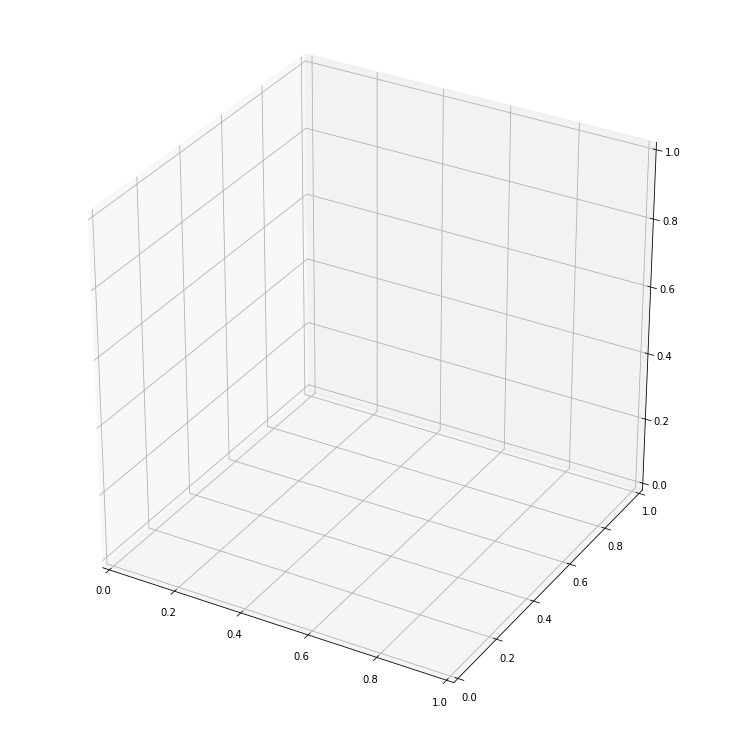

In [0]:
from sklearn.decomposition import PCA
from timeit import default_timer as timer
pca = PCA(n_components=3)
reduction = pca.fit_transform(app_new)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)
#take = 10000
ax.scatter(reduction[:,0], reduction[:,1], reduction[:,2],c = app_trainlabel,cmap = "coolwarm")

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(app_new, app_trainlabel)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(model, threshold=0.0, prefit=True)
select_X_train = selection.transform(app_new)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, app_trainlabel)
# eval model
select_X_test = selection.transform(app_testm)
y_predm = selection_model.predict(select_X_test)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(app_testlabel,y_predm),accuracy_score(app_testlabel,y_predm)

(array([[37968, 18165],
        [ 1328,  3521]]), 0.6803482994982126)

In [0]:
cm=confusion_matrix(app_testlabel,y_predm)

In [0]:
metric(cm)

[0.7261290987832543,
 0.27387090121674573,
 0.6763935652824542,
 0.32360643471754585]

In [0]:

from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(app_testlabel,y_predm)

(array([0.96620521, 0.16236281]),
 array([0.67639357, 0.7261291 ]),
 array([0.79573295, 0.26538534]),
 array([56133,  4849]))

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp y_test_new.csv /content/drive/My\ Drive/Colab\ Notebooks/Big\ Data\ Project\ Files

In [0]:
import pandas as pd
appDF=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Big Data Project Files/appDF_final.csv")

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(appDF.drop(["TARGET"],axis=1),appDF[["TARGET"]].values.ravel(),
                                                   random_state=42)

In [0]:
train_ids=X_train["SK_ID_CURR"]
test_ids=X_test["SK_ID_CURR"]
X_train=X_train.drop("SK_ID_CURR",axis=1)
X_test=X_test.drop("SK_ID_CURR",axis=1)

In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                     ('scaler', MinMaxScaler(feature_range = (0, 1)))])
                     
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

In [0]:
import numpy as np
np.save("X_train",X_train)
np.save("X_test",X_test)
np.save("y_train",y_train)
np.save("y_test",y_test)

In [0]:
import pandas as pd
import numpy as np
X_train=np.load("/content/drive/My Drive/Colab Notebooks/Big Data Project Files/X_train.npy")
X_test=np.load("/content/drive/My Drive/Colab Notebooks/Big Data Project Files/X_test.npy")
y_train=np.load("/content/drive/My Drive/Colab Notebooks/Big Data Project Files/y_train.npy")
y_test=np.load("/content/drive/My Drive/Colab Notebooks/Big Data Project Files/y_test.npy")

In [0]:
from sklearn.decomposition import PCA
from timeit import default_timer as timer
X_train_copy=X_train.copy()
X_test_copy=X_test.copy()
y_train_copy=y_train.copy()
pca = PCA(n_components=3)
start = timer()
reduction = pca.fit_transform(X_train_copy)
test_reduction = pca.transform(X_test_copy)
end = timer()

In [0]:
# reduction_train=pd.DataFrame(reduction,columns = ["0","1"])
# reduction_test=pd.DataFrame(test_reduction,columns = ["0","1"])

In [0]:
app = pd.read_csv('application_train.csv')
numcols = []
for col in app.columns:
    if app[col].dtype == "float" or app[col].dtype == "double" or app[col].dtype == "int" :
        numcols.append(col)
app2 = app[numcols]


tar = app2["TARGET"]
app2 = app2.drop(["SK_ID_CURR","TARGET"],axis = 1)


In [0]:
tar=feature_matrix['TARGET']
ids=feature_matrix['SK_ID_CURR']
feature_matrix=feature_matrix.drop(['TARGET','SK_ID_CURR'],axis=1)

In [0]:
for col in feature_matrix:
  if feature_matrix[col]

In [0]:
# X_train_copy['pca_c1'] = reduction_train["0"]
# X_train_copy['pca_c2'] = reduction_train["1"]
# X_test_copy['pca_c1'] = reduction_test["0"]
# X_test_copy['pca_c2'] = reduction_test["1"]

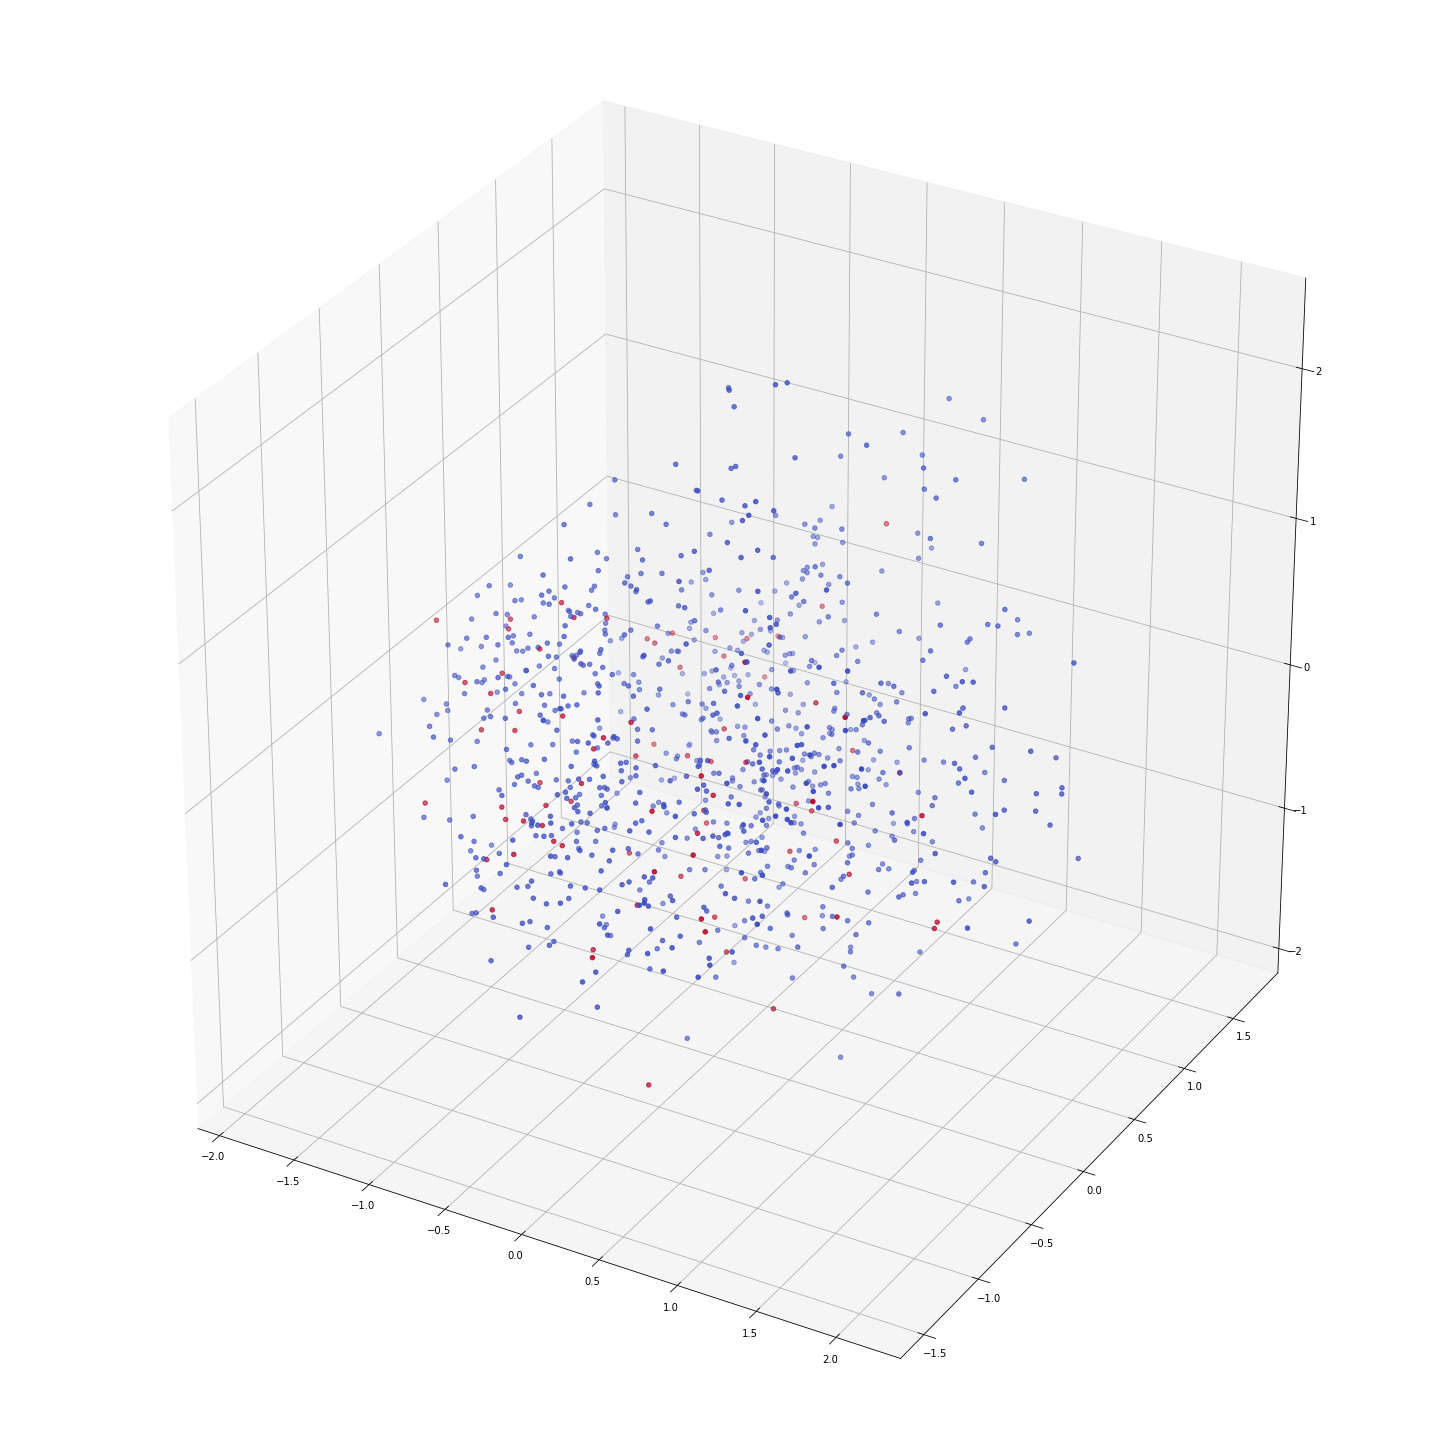

In [0]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(20,20))
ax = Axes3D(fig)
take = 1000
ax.scatter(reduction[:,0], reduction[:,1], reduction[:,2],c = y_train,cmap = "coolwarm")


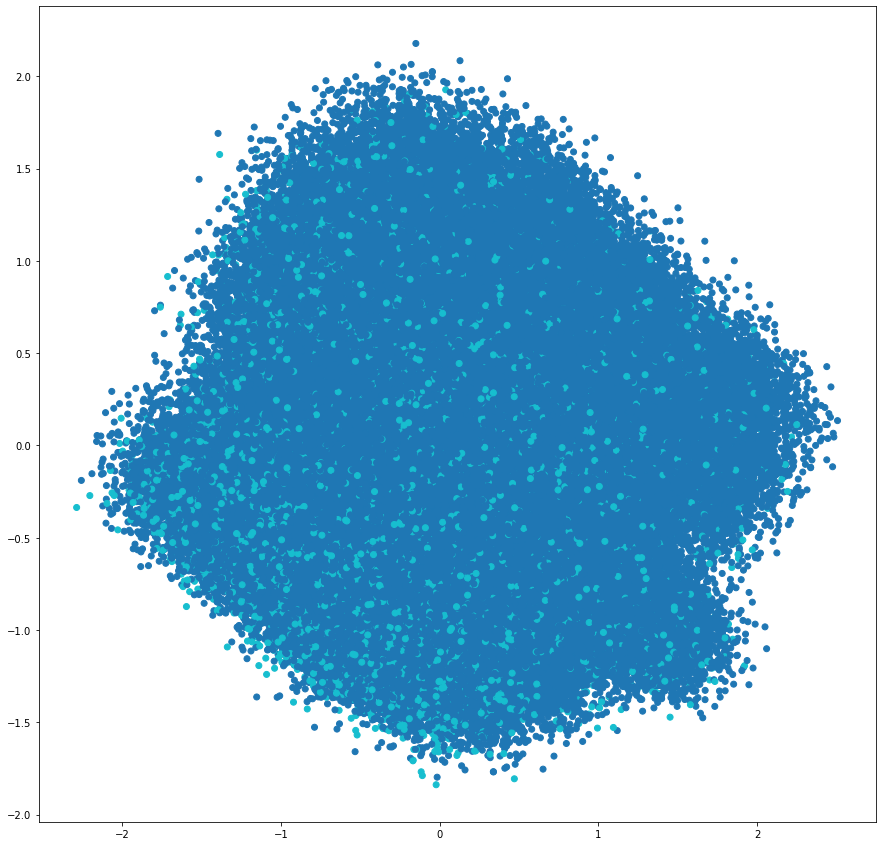

In [0]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
cmap = plt.get_cmap('tab10', 4)

fig = plt.figure(figsize = (15, 15))
# ax = fig.add_subplot(111, projection='2d')
plt.scatter(reduction_train["0"], reduction_train["1"], c = y_train, cmap = cmap)

# fig.colorbar(, aspect = 4, ticks = [1, 2, 3, 4])

In [0]:
# pandas and numpy for data manipulation
import pandas as pd
import numpy as np

# automated feature engineering
import featuretools as ft

# Filter out pandas warnings
import warnings 
warnings.filterwarnings('ignore')

# Read in the datasets and limit to the first 1000 rows (sorted by SK_ID_CURR) 
# This allows us to actually see the results in a reasonable amount of time! 
app_train = pd.read_csv('application_train.csv').sort_values('SK_ID_CURR').reset_index().loc[:, :].drop(columns = ['index'])
# app_test = pd.read_csv('application_test.csv').sort_values('SK_ID_CURR').reset_index().loc[:, :].drop(columns = ['index'])
bureau = pd.read_csv('bureau.csv').sort_values(['SK_ID_CURR', 'SK_ID_BUREAU']).reset_index().loc[:, :].drop(columns = ['index'])
bureau_balance = pd.read_csv('bureau_balance.csv').sort_values('SK_ID_BUREAU').reset_index().loc[:, :].drop(columns = ['index'])
cash = pd.read_csv('POS_CASH_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index().loc[:, :].drop(columns = ['index'])
credit = pd.read_csv('credit_card_balance.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index().loc[:, :].drop(columns = ['index'])
previous = pd.read_csv('previous_application.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index().loc[:, :].drop(columns = ['index'])
installments = pd.read_csv('installments_payments.csv').sort_values(['SK_ID_CURR', 'SK_ID_PREV']).reset_index().loc[:, :].drop(columns = ['index'])

In [0]:
app_types = {}

# Iterate through the columns and record the Boolean columns
for col in app_train:
    # If column is a number with only two values, encode it as a Boolean
    if (app_train[col].dtype != 'object') and (len(app_train[col].unique()) <= 2):
        app_types[col] = ft.variable_types.Boolean

print('Number of boolean variables: ', len(app_types))

Number of boolean variables:  33


In [0]:
# Record ordinal variables
app_types['REGION_RATING_CLIENT'] = ft.variable_types.Ordinal
app_types['REGION_RATING_CLIENT_W_CITY'] = ft.variable_types.Ordinal


# Record boolean variables in the previous data
previous_types= {'NFLAG_LAST_APPL_IN_DAY': ft.variable_types.Boolean,
                 'NFLAG_INSURED_ON_APPROVAL': ft.variable_types.Boolean}


import re

def replace_day_outliers(df):
    """Replace 365243 with np.nan in any columns with DAYS"""
    for col in df.columns:
        if "DAYS" in col:
            df[col] = df[col].replace({365243: np.nan})

    return df

# Replace all the day outliers
app_train = replace_day_outliers(app_train)
previous = replace_day_outliers(previous)


In [0]:
# for df in [app_train,bureau,bureau_balance, previous,installments, credit, cash]:
#   for colname in df.columns:
#     if "DAYS" in colmane or "MONTHS" in colname:
#       try:
#         df[colname] = start_date + pd.to_timedelta(df[colname],"D")  
#       except Exception e:
#         print(colname, "is not timedelta")
# Convert to timedelta in days
for col in ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']:
    bureau[col] = pd.to_timedelta(bureau[col], 'D')
    
bureau[['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE']].head()

,DAYS_CREDIT,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,DAYS_CREDIT_UPDATE
0,-857 days,-492 days,-553 days,-155 days
1,-909 days,-179 days,-877 days,-155 days
2,-879 days,-514 days,-544 days,-155 days
3,-1572 days,-1329 days,-1328 days,-155 days
4,-559 days,902 days,NaT,-6 days


In [0]:
# Establish a starting date for all applications at Home Credit
start_date = pd.Timestamp("2020-04-20")
start_date

# Create the date columns
bureau['bureau_credit_application_date'] = start_date + bureau['DAYS_CREDIT']
bureau['bureau_credit_end_date'] = start_date + bureau['DAYS_CREDIT_ENDDATE']
bureau['bureau_credit_close_date'] = start_date + bureau['DAYS_ENDDATE_FACT']
bureau['bureau_credit_update_date'] = start_date + bureau['DAYS_CREDIT_UPDATE']

# Drop the time offset columns
# bureau = bureau.drop(columns = ['DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'DAYS_CREDIT_UPDATE'])
# Convert to timedelta
bureau_balance['MONTHS_BALANCE'] = pd.to_timedelta(bureau_balance['MONTHS_BALANCE'], 'D')
# Make a date column
bureau_balance['bureau_balance_date'] = start_date + bureau_balance['MONTHS_BALANCE']
bureau_balance = bureau_balance.drop(columns = ['MONTHS_BALANCE'])

for col in ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION']:
    previous[col] = pd.to_timedelta(previous[col], 'D')
    
# Make date columns
previous['previous_decision_date'] = start_date + previous['DAYS_DECISION']
previous['previous_drawing_date'] = start_date + previous['DAYS_FIRST_DRAWING']
previous['previous_first_due_date'] = start_date + previous['DAYS_FIRST_DUE']
previous['previous_last_duefirst_date'] = start_date + previous['DAYS_LAST_DUE_1ST_VERSION']
previous['previous_last_due_date'] = start_date + previous['DAYS_LAST_DUE']
previous['previous_termination_date'] = start_date + previous['DAYS_TERMINATION']

# Drop the time offset columns
previous = previous.drop(columns = ['DAYS_DECISION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION'])

# Convert to timedelta objects
credit['MONTHS_BALANCE'] = pd.to_timedelta(credit['MONTHS_BALANCE'], 'D')
cash['MONTHS_BALANCE'] = pd.to_timedelta(cash['MONTHS_BALANCE'], 'D')

# Make a date column
credit['credit_balance_date'] = start_date + credit['MONTHS_BALANCE']
credit = credit.drop(columns = ['MONTHS_BALANCE'])

# Make a date column
cash['cash_balance_date'] = start_date + cash['MONTHS_BALANCE']
cash = cash.drop(columns = ['MONTHS_BALANCE'])



# Convert to time delta object
installments['DAYS_INSTALMENT'] = pd.to_timedelta(installments['DAYS_INSTALMENT'], 'D')
installments['DAYS_ENTRY_PAYMENT'] = pd.to_timedelta(installments['DAYS_ENTRY_PAYMENT'], 'D')

# Create time column and drop
installments['installments_due_date'] = start_date + installments['DAYS_INSTALMENT']
installments = installments.drop(columns = ['DAYS_INSTALMENT'])

installments['installments_paid_date'] = start_date + installments['DAYS_ENTRY_PAYMENT']
installments = installments.drop(columns = ['DAYS_ENTRY_PAYMENT'])

Timestamp('2020-04-20 00:00:00')

In [0]:
app_train

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188.0,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225.0,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039.0,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038.0,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,225000.0,Unaccompanied,Working,Secondary / secondary special,Separated,With parents,0.032561,-9327,-236.0,-8456.0,-1982,NaN,1,1,0,1,0,0,Sales staff,1.0,1,1,THURSDAY,15,0,0

In [0]:
msk = np.random.rand(len(app_train)) < 0.8

app_test = app_train[~msk]
app_test_label = app_test[["SK_ID_CURR","TARGET"]]

app_train = app_train[msk]
app_train_label=app_train[["SK_ID_CURR","TARGET"]]

In [0]:
#4935 1's out of 61674
app_test.shape

(61674, 122)

In [0]:
app_test.shape

(61674, 122)

In [0]:
app_train_ones=app_train[app_train["TARGET"]==1]
app_train_ones.shape

(19890, 122)

In [0]:
app_train_zeros=app_train[app_train["TARGET"]==0]
app_train_zeros.shape

(225947, 122)

In [0]:
app_train_zeros_sample=app_train_zeros.sample(frac=0.080907)

In [0]:
app_train_new=pd.concat([app_train_ones,app_train_zeros_sample],join='outer')

In [0]:
app_train_new.shape

(38171, 122)

In [0]:
app_train_new=app_train_new.sample(frac=1)

In [0]:
app_train_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
90153,204666,1,Cash loans,F,N,Y,0,130500.0,450000.0,22018.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.025164,-10777,-2282.0,-839.0,-1798,NaN,1,1,1,1,0,1,Laborers,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,...,0.1086,0.1222,0.0,0.0,reg oper account,block of flats,0.1107,Block,No,1.0,1.0,1.0,1.0,-820.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
246219,384958,1,Revolving loans,M,N,Y,0,112500.0,315000.0,15750.0,315000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.010966,-20189,NaN,-8428.0,-2066,NaN,1,0,0,1,0,0,NaN,2.0,2,2,TUESDAY,13,0,0,0,0,0,0,...,0.1214,0.1481,0.0,0.0,NaN,block of flats,0.1297,Panel,No,0.0,0.0,0.0,0.0,-335.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,2.0,5.0
96573,212114,1,Cash loans,F,N,Y,1,360000.0,193392.0,14143.5,153000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,0.004849,-15718,-1016.0,-1509.0,-4126,NaN,1,1,0,1,0,0,Sales staff,3.0,2,2,MONDAY,10,0,0,0,0,0,0,...,NaN,0.0042,NaN,NaN,NaN,block of flats,0.0050,NaN,No,2.0,0.0,2.0,0.0,-2964.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
82902,196152,0,Cash loans,F,Y,N,2,126000.0,679500.0,28786.5,679500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.019101,-13962,-3079.0,-4629.0,-1191,24.0,1,1,1,1,1,0,NaN,4.0,2,2,MONDAY,8,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1590.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
296590,443624,1,Cash loans,F,N,Y,0,157500.0,508495.5,24592.5,454500.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.008230,-16637,-516.0,-7100.0,-177,NaN,1,1,0,1,0,0,Laborers,1.0,2,2,FRIDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
import numpy as np
import pandas as pd 

# Clearing up memory
import gc

# Featuretools for automated feature engineering
import featuretools as ft

# Suppress pandas warnings
import warnings
warnings.filterwarnings('ignore')

print('Reading in data')

# Read in the full datasets
# app_train = pd.read_csv('application_train.csv')
# bureau = pd.read_csv('bureau.csv')
# bureau_balance = pd.read_csv('bureau_balance.csv')
# cash = pd.read_csv('POS_CASH_balance.csv')
# credit = pd.read_csv('credit_card_balance.csv')
# previous = pd.read_csv('previous_application.csv')
# installments = pd.read_csv('installments_payments.csv')


#msk = np.random.rand(len(app_train_new)) < 0.8

#app_test = app_train_new[~msk]
#app_test_label = app_test[["SK_ID_CURR","TARGET"]]

#app_train_new = app_train_new[msk]
#app_train_label=app_train_new[["SK_ID_CURR","TARGET"]]

# Join the application dataframes together
#app_test['set'] = 'test'
#app_test['TARGET'] = -999
#app_train_new['set'] = 'train'

# Append the dataframes (this is a row bind in R)
#app = app_train_new.append(app_test, ignore_index = True)
app=app_train_new.copy()
# Create the entity set with an id
es = ft.EntitySet(id = 'Complexrelations')

# Add in all the entities

# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'app', dataframe = app, index = 'SK_ID_CURR')

es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'previous', dataframe = previous, index = 'SK_ID_PREV')

# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance, 
                              make_index = True, index = 'bb_index')

es = es.entity_from_dataframe(entity_id = 'cash', dataframe = cash, 
                              make_index = True, index = 'cash_index')

es = es.entity_from_dataframe(entity_id = 'installments', dataframe = installments,
                              make_index = True, index = 'in_index')

es = es.entity_from_dataframe(entity_id = 'credit', dataframe = credit,
                              make_index = True, index = 'credit_index')


# Relationship between app and bureau
r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau balance
r_bureau_balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
                           
print(es)
                           
print('Clearing up memory')

gc.enable()
# Clear up memory
#del app, bureau, bureau_balance, cash, credit, installments, previous
gc.collect()


Reading in data
Entityset: Complexrelations
  Entities:
    app [Rows: 38171, Columns: 122]
    bureau [Rows: 1716428, Columns: 21]
    previous [Rows: 1670214, Columns: 37]
    bureau_balance [Rows: 27299925, Columns: 4]
    cash [Rows: 10001358, Columns: 9]
    installments [Rows: 13605401, Columns: 9]
    credit [Rows: 3840312, Columns: 24]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    installments.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV
Clearing up memory


44

In [0]:

print('Deep Feature Synthesis in Progress')

# Default primitives from featuretools
default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
default_trans_primitives =  ["day", "year", "month", "weekday", "haversine", "numwords", "characters"]

# DFS for application features using a max depth of 2
feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'app',
                       trans_primitives = default_trans_primitives,
                       agg_primitives=default_agg_primitives, 
                       max_depth = 2, features_only=False, verbose = True)
                       
# Reset the index to make SK_ID_CURR a column again                                      
feature_matrix = feature_matrix.reset_index()

Deep Feature Synthesis in Progress
Built 1555 features
Elapsed: 39:16 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [0]:
feature_matrix_new=feature_matrix.copy()

In [0]:
#import pandas as pd
#feature_matrix=pd.read_csv('content/drive/My\ Drive/Colab\ Notebooks/Big\ Data\ Project\ Files/autoFeature_balancedrows.csv')

In [0]:
feature_matrix.shape

(38171, 1556)

In [0]:
app_test_label

,SK_ID_CURR,TARGET
50027,157908,0
205717,338453,0
271821,415153,0
208542,341712,1
166677,293228,0
...,...,...
88107,202284,0
236335,373738,0
198383,330015,0
166694,293247,1


In [0]:
#feature_matrix=feature_matrix.merge(app_test_label,on="SK_ID_CURR",how="left")

In [0]:
feature_matrix.shape

(47658, 1558)

In [0]:
#feature_matrix_train=feature_matrix[feature_matrix["TARGET_y"].isna()]

In [0]:
#feature_matrix_test=feature_matrix[feature_matrix["TARGET_y"].notna()]

In [0]:
#feature_matrix_train=feature_matrix_train.rename(columns={"TARGET_x": "TARGET"})
#feature_matrix_test=feature_matrix_test.rename(columns={"TARGET_y": "TARGET"})
#feature_matrix_train=feature_matrix_train.drop("TARGET_y",axis=1)
#feature_matrix_test=feature_matrix_test.drop("TARGET_x",axis=1)

In [0]:
#feature_matrix_new=pd.concat([feature_matrix_train,feature_matrix_test])
#feature_matrix_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,NUM_UNIQUE(previous.YEAR(previous_last_due_date)),NUM_UNIQUE(previous.YEAR(previous_termination_date)),NUM_UNIQUE(previous.MONTH(previous_decision_date)),NUM_UNIQUE(previous.MONTH(previous_drawing_date)),NUM_UNIQUE(previous.MONTH(previous_first_due_date)),NUM_UNIQUE(previous.MONTH(previous_last_duefirst_date)),NUM_UNIQUE(previous.MONTH(previous_last_due_date)),NUM_UNIQUE(previous.MONTH(previous_termination_date)),NUM_UNIQUE(previous.WEEKDAY(previous_decision_date)),NUM_UNIQUE(previous.WEEKDAY(previous_drawing_date)),NUM_UNIQUE(previous.WEEKDAY(previous_first_due_date)),NUM_UNIQUE(previous.WEEKDAY(previous_last_duefirst_date)),NUM_UNIQUE(previous.WEEKDAY(previous_last_due_date)),NUM_UNIQUE(previous.WEEKDAY(previous_termination_date)),MODE(previous.MODE(cash.NAME_CONTRACT_STATUS)),MODE(previous.MODE(credit.NAME_CONTRACT_STATUS)),MODE(previous.DAY(previous_decision_date)),MODE(previous.DAY(previous_drawing_date)),MODE(previous.DAY(previous_first_due_date)),MODE(previous.DAY(previous_last_duefirst_date)),MODE(previous.DAY(previous_last_due_date)),MODE(previous.DAY(previous_termination_date)),MODE(previous.YEAR(previous_decision_date)),MODE(previous.YEAR(previous_drawing_date)),MODE(previous.YEAR(previous_first_due_date)),MODE(previous.YEAR(previous_last_duefirst_date)),MODE(previous.YEAR(previous_last_due_date)),MODE(previous.YEAR(previous_termination_date)),MODE(previous.MONTH(previous_decision_date)),MODE(previous.MONTH(previous_drawing_date)),MODE(previous.MONTH(previous_first_due_date)),MODE(previous.MONTH(previous_last_duefirst_date)),MODE(previous.MONTH(previous_last_due_date)),MODE(previous.MONTH(previous_termination_date)),MODE(previous.WEEKDAY(previous_decision_date)),MODE(previous.WEEKDAY(previous_drawing_date)),MODE(previous.WEEKDAY(previous_first_due_date)),MODE(previous.WEEKDAY(previous_last_duefirst_date)),MODE(previous.WEEKDAY(previous_last_due_date)),MODE(previous.WEEKDAY(previous_termination_date))
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,Active,NaN,23.0,NaN,3.0,23.0,26.0,3.0,2018.0,NaN,2018.0,2020.0,2020.0,2020.0,8.0,NaN,10.0,8.0,3.0,4.0,3.0,NaN,2.0,6.0,3.0,4.0
1,100010,0.0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449.0,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,Active,NaN,16.0,NaN,16.0,13.0,13.0,20.0,2017.0,NaN,2017.0,2018.0,2018.0,2018.0,5.0,NaN,6.0,3.0,3.0,3.0,1.0,NaN,4.0,1.0,1.0,1.0
2,100026,0.0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,-11146,-4306.0,-114.0,-2518,NaN,1,1,0,1,0,0,Sales staff,3.0,3,2,THURSDAY,6,0,0,0,0,0,0,...,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,Active,NaN,8.0,NaN,7.0,21.0,9.0,9.0,2019.0,NaN,2016.0,2016.0,2016.0,2016.0,1.0,NaN,2.0,11.0,3.0,4.0,1.0,NaN,3.0,0.0,0.0,1.0
3,100029,0.0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Un

In [0]:
#To find if SK_ID_CURR and TARGET are int
#feature_matrix_new["TARGET"]=feature_matrix_new["TARGET"].astype('int')
#feature_matrix_new.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,NUM_UNIQUE(previous.YEAR(previous_last_due_date)),NUM_UNIQUE(previous.YEAR(previous_termination_date)),NUM_UNIQUE(previous.MONTH(previous_decision_date)),NUM_UNIQUE(previous.MONTH(previous_drawing_date)),NUM_UNIQUE(previous.MONTH(previous_first_due_date)),NUM_UNIQUE(previous.MONTH(previous_last_duefirst_date)),NUM_UNIQUE(previous.MONTH(previous_last_due_date)),NUM_UNIQUE(previous.MONTH(previous_termination_date)),NUM_UNIQUE(previous.WEEKDAY(previous_decision_date)),NUM_UNIQUE(previous.WEEKDAY(previous_drawing_date)),NUM_UNIQUE(previous.WEEKDAY(previous_first_due_date)),NUM_UNIQUE(previous.WEEKDAY(previous_last_duefirst_date)),NUM_UNIQUE(previous.WEEKDAY(previous_last_due_date)),NUM_UNIQUE(previous.WEEKDAY(previous_termination_date)),MODE(previous.MODE(cash.NAME_CONTRACT_STATUS)),MODE(previous.MODE(credit.NAME_CONTRACT_STATUS)),MODE(previous.DAY(previous_decision_date)),MODE(previous.DAY(previous_drawing_date)),MODE(previous.DAY(previous_first_due_date)),MODE(previous.DAY(previous_last_duefirst_date)),MODE(previous.DAY(previous_last_due_date)),MODE(previous.DAY(previous_termination_date)),MODE(previous.YEAR(previous_decision_date)),MODE(previous.YEAR(previous_drawing_date)),MODE(previous.YEAR(previous_first_due_date)),MODE(previous.YEAR(previous_last_duefirst_date)),MODE(previous.YEAR(previous_last_due_date)),MODE(previous.YEAR(previous_termination_date)),MODE(previous.MONTH(previous_decision_date)),MODE(previous.MONTH(previous_drawing_date)),MODE(previous.MONTH(previous_first_due_date)),MODE(previous.MONTH(previous_last_duefirst_date)),MODE(previous.MONTH(previous_last_due_date)),MODE(previous.MONTH(previous_termination_date)),MODE(previous.WEEKDAY(previous_decision_date)),MODE(previous.WEEKDAY(previous_drawing_date)),MODE(previous.WEEKDAY(previous_first_due_date)),MODE(previous.WEEKDAY(previous_last_duefirst_date)),MODE(previous.WEEKDAY(previous_last_due_date)),MODE(previous.WEEKDAY(previous_termination_date))
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,Active,NaN,23.0,NaN,3.0,23.0,26.0,3.0,2018.0,NaN,2018.0,2020.0,2020.0,2020.0,8.0,NaN,10.0,8.0,3.0,4.0,3.0,NaN,2.0,6.0,3.0,4.0
1,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.003122,-18850,-449.0,-4597.0,-2379,8.0,1,1,1,1,0,0,Managers,2.0,3,3,MONDAY,16,0,0,0,0,1,1,...,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,Active,NaN,16.0,NaN,16.0,13.0,13.0,20.0,2017.0,NaN,2017.0,2018.0,2018.0,2018.0,5.0,NaN,6.0,3.0,3.0,3.0,1.0,NaN,4.0,1.0,1.0,1.0
2,100026,0,Cash loans,F,N,N,1,450000.0,497520.0,32521.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,Rented apartment,0.020713,-11146,-4306.0,-114.0,-2518,NaN,1,1,0,1,0,0,Sales staff,3.0,3,2,THURSDAY,6,0,0,0,0,0,0,...,2.0,2.0,3.0,0.0,2.0,2.0,2.0,2.0,2.0,0.0,2.0,2.0,2.0,2.0,Active,NaN,8.0,NaN,7.0,21.0,9.0,9.0,2019.0,NaN,2016.0,2016.0,2016.0,2016.0,1.0,NaN,2.0,11.0,3.0,4.0,1.0,NaN,3.0,0.0,0.0,1.0
3,100029,0,Cash loans,M,Y,N,2,135000.0,247500.0,12703.5,247500.0,Unaccompan

In [0]:
catdata = feature_matrix_new.select_dtypes(['category','object'])
categorical = pd.get_dummies(catdata)
        
        # Make sure to put the identifying id on the column
categorical["SK_ID_CURR"] = feature_matrix_new["SK_ID_CURR"]

In [0]:
feature_matrix_new=feature_matrix_new.drop(columns=catdata.columns)

In [0]:
feature_matrix_new=feature_matrix_new.merge(categorical,on="SK_ID_CURR",how='left')

In [0]:
feature_matrix_new.to_csv("allfeatures_balancednew1.csv")

In [0]:
!cp allfeatures_balancednew1.csv drive/My\ Drive/Colab\ Notebooks/

In [0]:
feature_matrix_new=pd.read_csv("allfeatures_balancednew1.csv")

In [0]:
feature_matrix_new=feature_matrix_new.drop("Unnamed: 0",axis=1)

In [0]:
ids=feature_matrix_new["SK_ID_CURR"]
tar=feature_matrix_new["TARGET"]
feature_matrix_new=feature_matrix_new.drop(["SK_ID_CURR","TARGET"],axis=1)

In [0]:
def missing(df, threshold = 50):
    # Calculate missing stats 
    miss = pd.DataFrame(df.isnull().sum())
    miss['percent'] = 100 * miss[0] / len(df)
        
    # list of missing columns
    missing_columns = (miss[miss['percent']>threshold])
    return missing_columns

(array([  6.,   0.,   0.,   0., 169.,  97.,  98.,   0.,   0.,   0.,   0.,
          6.,   4.,   4.,   1.,  61.,   4.,   0.,   3.,   0.,   0.,  39.,
          3.,   0.,   0.,   3.,   0.,   9.,   4.,   0.,   0.,   0.,   2.,
          0.,  15.,   0.,  38.,   5.,  16.,  10.,   8.,   0.,   0.,   0.,
          3.,   1.,   0.,   2.,   0.,   0.,   0.,   4.,   3.,  10.,   0.,
          0.,   4.,   1.,  18.,   5.,   0.,   7.,   0.,  21.,   0.,   0.,
          0.,   1.,   3.,   4.,   8.,   6.,   0., 242.,   0.,   1.,   0.,
          1.,   0.,  75.,  56.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,
        166.]),
 array([7.85936968e-02, 1.07778156e+00, 2.07696943e+00, 3.07615729e+00,
        4.07534516e+00, 5.07453302e+00, 6.07372089e+00, 7.07290875e+00,
        8.07209662e+00, 9.07128448e+00, 1.00704723e+01, 1.10696602e+01,
        1.20688481e+01, 1.30680359e+01, 1.40672238e+01, 1.50664117e+01,
        1.60655995e+01, 1.7064

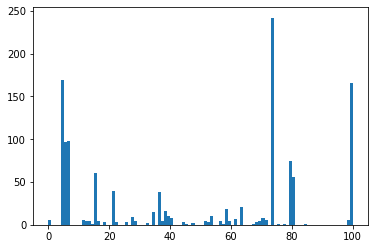

In [0]:
import matplotlib.pyplot as plt
missing_columns=missing(feature_matrix_new,threshold=0)
plt.hist(missing_columns['percent'],bins=100)

In [0]:
#missing_columns=missing(feature_matrix,threshold=25)
#feature_matrix1=feature_matrix.drop(missing_columns.index,axis=1)

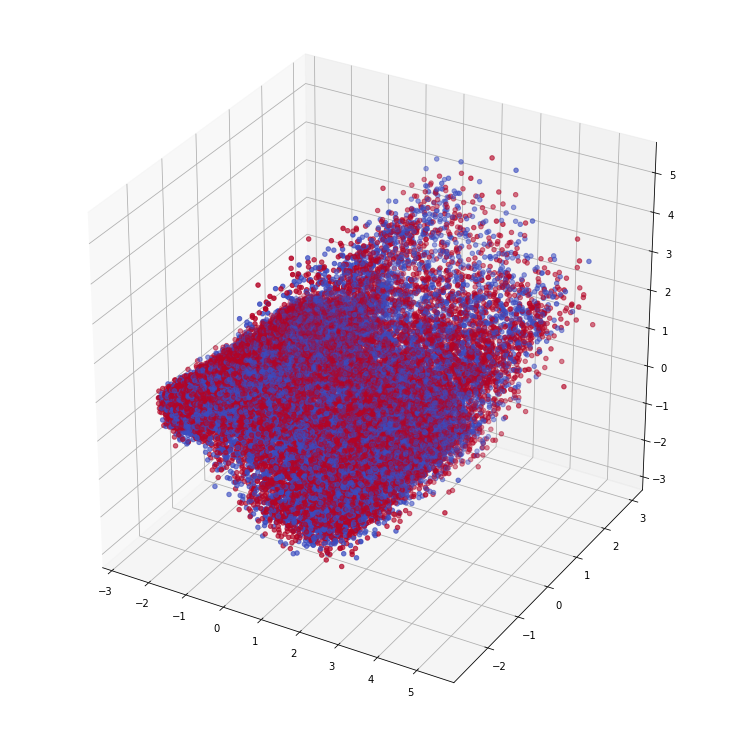

In [0]:
#with nulls imputed
from sklearn.decomposition import PCA
from timeit import default_timer as timer
pca = PCA(n_components=3)
reduction = pca.fit_transform(feature_matrix_new)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
import random


fig = pyplot.figure(figsize=(10,10))
ax = Axes3D(fig)
#take = 10000
ax.scatter(reduction[:,0], reduction[:,1], reduction[:,2],c = tar,cmap = "coolwarm")

In [0]:
app=app_test.copy()
# Create the entity set with an id
es = ft.EntitySet(id = 'Complexrelations')

# Add in all the entities

# Entities with a unique index
es = es.entity_from_dataframe(entity_id = 'app', dataframe = app, index = 'SK_ID_CURR')

es = es.entity_from_dataframe(entity_id = 'bureau', dataframe = bureau, index = 'SK_ID_BUREAU')

es = es.entity_from_dataframe(entity_id = 'previous', dataframe = previous, index = 'SK_ID_PREV')

# Entities that do not have a unique index
es = es.entity_from_dataframe(entity_id = 'bureau_balance', dataframe = bureau_balance, 
                              make_index = True, index = 'bb_index')

es = es.entity_from_dataframe(entity_id = 'cash', dataframe = cash, 
                              make_index = True, index = 'cash_index')

es = es.entity_from_dataframe(entity_id = 'installments', dataframe = installments,
                              make_index = True, index = 'in_index')

es = es.entity_from_dataframe(entity_id = 'credit', dataframe = credit,
                              make_index = True, index = 'credit_index')


# Relationship between app and bureau
r_app_bureau = ft.Relationship(es['app']['SK_ID_CURR'], es['bureau']['SK_ID_CURR'])

# Relationship between bureau and bureau balance
r_bureau_balance = ft.Relationship(es['bureau']['SK_ID_BUREAU'], es['bureau_balance']['SK_ID_BUREAU'])

# Relationship between current app and previous apps
r_app_previous = ft.Relationship(es['app']['SK_ID_CURR'], es['previous']['SK_ID_CURR'])

# Relationships between previous apps and cash, installments, and credit
r_previous_cash = ft.Relationship(es['previous']['SK_ID_PREV'], es['cash']['SK_ID_PREV'])
r_previous_installments = ft.Relationship(es['previous']['SK_ID_PREV'], es['installments']['SK_ID_PREV'])
r_previous_credit = ft.Relationship(es['previous']['SK_ID_PREV'], es['credit']['SK_ID_PREV'])

# Add in the defined relationships
es = es.add_relationships([r_app_bureau, r_bureau_balance, r_app_previous,
                           r_previous_cash, r_previous_installments, r_previous_credit])
                           
print(es)

Entityset: Complexrelations
  Entities:
    app [Rows: 61674, Columns: 122]
    bureau [Rows: 1716428, Columns: 21]
    previous [Rows: 1670214, Columns: 37]
    bureau_balance [Rows: 27299925, Columns: 4]
    cash [Rows: 10001358, Columns: 9]
    installments [Rows: 13605401, Columns: 9]
    credit [Rows: 3840312, Columns: 24]
  Relationships:
    bureau.SK_ID_CURR -> app.SK_ID_CURR
    bureau_balance.SK_ID_BUREAU -> bureau.SK_ID_BUREAU
    previous.SK_ID_CURR -> app.SK_ID_CURR
    cash.SK_ID_PREV -> previous.SK_ID_PREV
    installments.SK_ID_PREV -> previous.SK_ID_PREV
    credit.SK_ID_PREV -> previous.SK_ID_PREV


In [0]:
print('Deep Feature Synthesis in Progress')

# Default primitives from featuretools
default_agg_primitives =  ["sum", "std", "max", "skew", "min", "mean", "count", "percent_true", "num_unique", "mode"]
default_trans_primitives =  ["day", "year", "month", "weekday", "haversine", "numwords", "characters"]

# DFS for application features using a max depth of 2
feature_matrix, feature_names = ft.dfs(entityset = es, target_entity = 'app',
                       trans_primitives = default_trans_primitives,
                       agg_primitives=default_agg_primitives, 
                       max_depth = 2, features_only=False, verbose = True)
                       
# Reset the index to make SK_ID_CURR a column again                                      
feature_matrix_test = feature_matrix.reset_index()

Deep Feature Synthesis in Progress
Built 1555 features
Elapsed: 1:03:13 | Remaining: 00:00 | Progress: 100%|██████████| Calculated: 11/11 chunks


In [0]:
feature_matrix_test.to_csv("allfeatures_balancednewtest.csv")

In [0]:
import pandas as pd
feature_matrix_test=pd.read_csv("allfeatures_balancednewtest.csv")

In [0]:
!cp allfeatures_balancednewtest.csv drive/My\ Drive/Colab\ Notebooks/

In [0]:
catdata_test = feature_matrix_test.select_dtypes(['category','object'])
categorical_test = pd.get_dummies(catdata_test)
        
        # Make sure to put the identifying id on the column
categorical_test["SK_ID_CURR"] = feature_matrix_test["SK_ID_CURR"]

In [0]:
feature_matrix_test=feature_matrix_test.drop(columns=catdata_test.columns)

In [0]:
feature_matrix_test=feature_matrix_test.merge(categorical_test,on="SK_ID_CURR",how='left')

In [0]:
test_ids=feature_matrix_test["SK_ID_CURR"]
test_tar=feature_matrix_test["TARGET"]
feature_matrix_test=feature_matrix_test.drop(["SK_ID_CURR","TARGET"],axis=1)

In [0]:
#feature_matrix_test

In [0]:
#feature_matrix_test=pd.DataFrame(feature_matrix_test)
feature_matrix_test=feature_matrix_test.drop("Unnamed: 0",axis=1)

In [0]:
feature_matrix_test.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,MODE(previous.PRODUCT_COMBINATION)_Cash Street: middle,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: high,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: low,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: middle,MODE(previous.PRODUCT_COMBINATION)_POS household with interest,MODE(previous.PRODUCT_COMBINATION)_POS household without interest,MODE(previous.PRODUCT_COMBINATION)_POS industry with interest,MODE(previous.PRODUCT_COMBINATION)_POS industry without interest,MODE(previous.PRODUCT_COMBINATION)_POS mobile with interest,MODE(previous.PRODUCT_COMBINATION)_POS mobile without interest,MODE(previous.PRODUCT_COMBINATION)_POS other with interest,MODE(previous.PRODUCT_COMBINATION)_POS others without interest,MODE(bureau_balance.STATUS)_0,MODE(bureau_balance.STATUS)_1,MODE(bureau_balance.STATUS)_5,MODE(bureau_balance.STATUS)_C,MODE(bureau_balance.STATUS)_X,MODE(credit.NAME_CONTRACT_STATUS)_Active,MODE(credit.NAME_CONTRACT_STATUS)_Completed,MODE(credit.NAME_CONTRACT_STATUS)_Signed,MODE(cash.NAME_CONTRACT_STATUS)_Active,MODE(cash.NAME_CONTRACT_STATUS)_Approved,MODE(cash.NAME_CONTRACT_STATUS)_Completed,MODE(cash.NAME_CONTRACT_STATUS)_Demand,MODE(cash.NAME_CONTRACT_STATUS)_Returned to the store,MODE(cash.NAME_CONTRACT_STATUS)_Signed,MODE(bureau.MODE(bureau_balance.STATUS))_0,MODE(bureau.MODE(bureau_balance.STATUS))_1,MODE(bureau.MODE(bureau_balance.STATUS))_2,MODE(bureau.MODE(bureau_balance.STATUS))_5,MODE(bureau.MODE(bureau_balance.STATUS))_C,MODE(bureau.MODE(bureau_balance.STATUS))_X,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Active,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Completed,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Signed,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Active,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Completed,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Demand,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Returned to the store,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Signed
0,0,38419.155,148365.0,10678.5,135000.0,0.015221,-20417,NaN,-5246.0,-2512,NaN,1,0,0,1,1,0,2.0,2,2,7,0,0,0,0,0,0,0.722044,0.555183,0.652897,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,1,202500.000,1132573.5,37561.5,927000.0,0.025164,-14815,-1652.0,-2299.0,-2299,14.0,1,1,0,1,0,0,3.0,2,2,9,0,0,0,0,0,0,0.437709,0.233767,0.542445,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,450000.000,497520.0,32521.5,450000.0,0.020713,-11146,-4306.0,-114.0,-2518,NaN,1,1,0,1,0,0,3.0,3,2,6,0,0,0,0,0,0,NaN,0.457143,0.358951,0.0907,0.0795,0.9786,0.7076,0.012,0.00,0.2069,0.1667,0.2083,0.0898,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
3,1,112500.000,327024.0,23827.5,270000.0,0.019101,-15948,-1234.0,-5782.0,-3153,NaN,1,1,0,1,0,0,3.0,2,2,10,0,0,0,0,1,1,NaN,0.541124,0.659406,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,112500.000,512064.0,25033.5,360000.0,0.008575,-11144,-1104.0,-7846.0,-2904,NaN,1,1,0,1,0,0,2.0,2,2,12,0,0,0,0,0,0,0.274422,0.627300,NaN,0.3670,0.3751,0.9901,NaN,NaN,0.28,0.4828,0.3750,NaN,0.1569,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0

In [0]:
feature_matrix_new

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,MODE(previous.PRODUCT_COMBINATION)_Cash Street: high,MODE(previous.PRODUCT_COMBINATION)_Cash Street: low,MODE(previous.PRODUCT_COMBINATION)_Cash Street: middle,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: high,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: low,MODE(previous.PRODUCT_COMBINATION)_Cash X-Sell: middle,MODE(previous.PRODUCT_COMBINATION)_POS household with interest,MODE(previous.PRODUCT_COMBINATION)_POS household without interest,MODE(previous.PRODUCT_COMBINATION)_POS industry with interest,MODE(previous.PRODUCT_COMBINATION)_POS industry without interest,MODE(previous.PRODUCT_COMBINATION)_POS mobile with interest,MODE(previous.PRODUCT_COMBINATION)_POS mobile without interest,MODE(previous.PRODUCT_COMBINATION)_POS other with interest,MODE(previous.PRODUCT_COMBINATION)_POS others without interest,MODE(bureau_balance.STATUS)_0,MODE(bureau_balance.STATUS)_1,MODE(bureau_balance.STATUS)_5,MODE(bureau_balance.STATUS)_C,MODE(bureau_balance.STATUS)_X,MODE(credit.NAME_CONTRACT_STATUS)_Active,MODE(credit.NAME_CONTRACT_STATUS)_Completed,MODE(credit.NAME_CONTRACT_STATUS)_Signed,MODE(cash.NAME_CONTRACT_STATUS)_Active,MODE(cash.NAME_CONTRACT_STATUS)_Completed,MODE(cash.NAME_CONTRACT_STATUS)_Demand,MODE(cash.NAME_CONTRACT_STATUS)_Returned to the store,MODE(cash.NAME_CONTRACT_STATUS)_Signed,MODE(bureau.MODE(bureau_balance.STATUS))_0,MODE(bureau.MODE(bureau_balance.STATUS))_1,MODE(bureau.MODE(bureau_balance.STATUS))_5,MODE(bureau.MODE(bureau_balance.STATUS))_C,MODE(bureau.MODE(bureau_balance.STATUS))_X,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Active,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Completed,MODE(previous.MODE(credit.NAME_CONTRACT_STATUS))_Signed,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Active,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Completed,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Demand,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Returned to the store,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))_Signed
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637.0,-3648.0,-2120,NaN,1,1,0,1,1,0,1.0,2,2,10,0,0,0,0,0,0,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
1,0,99000.0,490495.5,27517.5,454500.0,0.035792,-16941,-1588.0,-4970.0,-477,NaN,1,1,1,1,1,0,2.0,2,2,16,0,0,0,0,0,0,NaN,0.354225,0.621226,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,0,112500.0,979992.0,27076.5,702000.0,0.018029,-18724,-2628.0,-6573.0,-1827,NaN,1,1,0,1,0,0,1.0,3,2,9,0,0,0,0,0,0,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,90000.0,180000.0,9000.0,180000.0,0.030755,-10341,-1010.0,-4799.0,-3015,NaN,1,1,0,1,0,0,1.0,2,2,16,0,0,0,0,0,0,0.297914,0.502779,NaN,0.1505,0.0838,0.9831,0.7688,0.0188,0.16,0.1379,0.3333,0.3750,0.0872,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,292500.0,665892.0,24592.5,477000.0,0.025164,-15280,-2668.0,-5266.0,-3787,NaN,1,1,0,1,0,1,2.0,2,2,13,0,0,0,0,0,0,NaN,0.479987,0.410103,0.0124,NaN,0.9697,NaN,NaN,0.00,0.0690,0.0417,NaN,NaN,...,0,0,0,0

In [0]:
from featuretools import selection

# Remove low information features
feature_matrix2 = selection.remove_low_information_features(feature_matrix_new)
print('Removed %d features from training features'  % (feature_matrix_new.shape[1] - feature_matrix2.shape[1]))

feature_matrix_test2 = selection.remove_low_information_features(feature_matrix_test)
print('Removed %d features from testing features' % (feature_matrix_test.shape[1] - feature_matrix_test2.shape[1]))

Removed 14 features from training features
Removed 39 features from testing features


In [0]:
feature_matrix1, feature_matrix_test = feature_matrix2.align(feature_matrix_test2, join = 'inner', axis = 1)

In [0]:
features=pd.DataFrame(feature_matrix1.columns)
features

,0
0,CNT_CHILDREN
1,AMT_INCOME_TOTAL
2,AMT_CREDIT
3,AMT_ANNUITY
4,AMT_GOODS_PRICE
...,...
1776,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...
1777,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...
1778,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...
1779,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...


In [0]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

pipeline = Pipeline([('imputer', SimpleImputer(missing_values=np.nan, strategy='median')),
                     ('scaler', MinMaxScaler(feature_range = (0, 1)))])
                     
feature_matrix1 = pipeline.fit_transform(feature_matrix1)
feature_matrix_test = pipeline.transform(feature_matrix_test)

In [0]:
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot

model = XGBClassifier()
model.fit(feature_matrix1, tar)
# plot feature importance
#plot_importance(model)
#pyplot.show()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
feature_imp=pd.DataFrame(model.feature_importances_)

In [0]:
feature_imp

,0
0,0.000000
1,0.001522
2,0.005624
3,0.006627
4,0.007318
...,...
1776,0.000000
1777,0.000000
1778,0.000000
1779,0.000000


In [0]:
features['features']=features[0]

In [0]:
features=features.drop(0,axis=1)

In [0]:
feat=pd.concat([features,feature_imp],axis=1)

In [0]:
feat

,features,0
0,CNT_CHILDREN,0.000000
1,AMT_INCOME_TOTAL,0.001522
2,AMT_CREDIT,0.005624
3,AMT_ANNUITY,0.006627
4,AMT_GOODS_PRICE,0.007318
...,...,...
1776,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.000000
1777,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.000000
1778,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.000000
1779,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.000000


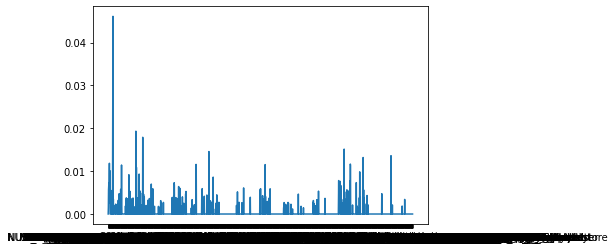

In [0]:
import matplotlib.pyplot as plt
plt.plot(feat["features"],feat[0])

In [0]:
feat.sort_values(by=0,ascending=False).head(10)

,features,0
28,EXT_SOURCE_3,0.046120
27,EXT_SOURCE_2,0.030757
162,MEAN(bureau.DAYS_CREDIT),0.019325
202,STD(previous.CNT_PAYMENT),0.017905
1380,MEAN(previous.MIN(installments.AMT_PAYMENT)),0.015142
589,SUM(previous.MEAN(credit.CNT_DRAWINGS_ATM_CURR...,0.014575
1654,MODE(previous.NAME_CONTRACT_STATUS)_Refused,0.013605
1491,NAME_EDUCATION_TYPE_Higher education,0.013187
26,EXT_SOURCE_1,0.012284
7,DAYS_EMPLOYED,0.011839


In [0]:
feat[feat[0]==0]

,features,0
0,CNT_CHILDREN,0.0
11,FLAG_EMP_PHONE,0.0
12,FLAG_WORK_PHONE,0.0
13,FLAG_CONT_MOBILE,0.0
14,FLAG_PHONE,0.0
...,...,...
1776,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1777,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1778,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1779,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0


In [0]:
feat[feat[0]<=0.0001]

,features,0
0,CNT_CHILDREN,0.0
11,FLAG_EMP_PHONE,0.0
12,FLAG_WORK_PHONE,0.0
13,FLAG_CONT_MOBILE,0.0
14,FLAG_PHONE,0.0
...,...,...
1776,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1777,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1778,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0
1779,MODE(previous.MODE(cash.NAME_CONTRACT_STATUS))...,0.0


In [0]:
from sklearn.feature_selection import SelectFromModel
selection = SelectFromModel(model, threshold=0.0, prefit=True)
select_X_train = selection.transform(feature_matrix1)
# train model
selection_model = XGBClassifier()
selection_model.fit(select_X_train, tar)
# eval model
select_X_test = selection.transform(feature_matrix_test)
y_pred = selection_model.predict(select_X_test)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
confusion_matrix(test_tar,y_pred),accuracy_score(test_tar,y_pred)

(array([[37993, 18746],
        [ 1308,  3627]]), 0.6748386678340954)

In [0]:
cm=confusion_matrix(test_tar,y_pred)

In [0]:
def metric(cm):
  TPR=cm[1][1]/(cm[1][0]+cm[1][1])
  FNR=cm[1][0]/(cm[1][0]+cm[1][1])
  TNR=cm[0][0]/(cm[0][0]+cm[0][1])
  FPR=cm[0][1]/(cm[0][0]+cm[0][1])
  return [TPR,FNR,TNR,FPR]

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(test_tar,y_pred)

(array([0.9667184 , 0.16211505]),
 array([0.66960997, 0.73495441]),
 array([0.79119117, 0.26563644]),
 array([56739,  4935]))

In [0]:
metric(cm)

[0.7349544072948329,
 0.2650455927051672,
 0.6696099684520348,
 0.33039003154796526]

In [0]:
import pandas as pd
import numpy as np
np.save("X_train_new.npy",feature_matrix1)
np.save("X_test_new.npy",feature_matrix_test)


In [0]:
import pandas as pd
import numpy as np

tar.to_csv("y_train_new.csv")
test_tar.to_csv("y_test_new.csv")

In [0]:
import pickle
pickle.dump(model, open("xgb_baseline.pickle.dat", "wb"))

In [0]:
#loaded_model = pickle.load(open("xgb_baseline.pickle.dat", "rb"))

# Modeling

In [0]:
def metric(cm):
  TPR=cm[1][1]/(cm[1][0]+cm[1][1])
  FNR=cm[1][0]/(cm[1][0]+cm[1][1])
  TNR=cm[0][0]/(cm[0][0]+cm[0][1])
  FPR=cm[0][1]/(cm[0][0]+cm[0][1])
  return [TPR,FNR,TNR,FPR]

In [0]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(app22,tar.values,
                                                   random_state=23)
logreg = LogisticRegressionCV(Cs = 20, cv = 3,class_weight={0:0.20,1:0.8})
logreg.fit(X_train, y_train)
predictions = logreg.predict_proba(X_train)[:, 1]

(array([5.000e+00, 7.000e+00, 1.000e+01, 2.300e+01, 2.400e+01, 4.300e+01,
        6.600e+01, 1.200e+02, 1.490e+02, 2.320e+02, 3.190e+02, 4.910e+02,
        6.460e+02, 8.060e+02, 1.186e+03, 1.379e+03, 1.722e+03, 1.942e+03,
        2.162e+03, 2.233e+03, 2.512e+03, 2.721e+03, 2.911e+03, 2.936e+03,
        2.983e+03, 2.978e+03, 2.997e+03, 3.031e+03, 3.062e+03, 3.011e+03,
        2.900e+03, 2.936e+03, 2.902e+03, 3.079e+03, 3.086e+03, 3.320e+03,
        3.608e+03, 3.651e+03, 3.866e+03, 4.009e+03, 4.224e+03, 4.425e+03,
        4.593e+03, 4.824e+03, 4.894e+03, 5.098e+03, 5.120e+03, 5.077e+03,
        5.084e+03, 5.173e+03, 5.148e+03, 4.912e+03, 5.026e+03, 4.777e+03,
        4.601e+03, 4.505e+03, 4.299e+03, 4.021e+03, 4.007e+03, 3.848e+03,
        3.713e+03, 3.429e+03, 3.400e+03, 3.325e+03, 3.145e+03, 2.964e+03,
        2.981e+03, 2.757e+03, 2.761e+03, 2.620e+03, 2.439e+03, 2.401e+03,
        2.274e+03, 2.202e+03, 2.106e+03, 1.902e+03, 1.731e+03, 1.745e+03,
        1.591e+03, 1.464e+03, 1.314e+0

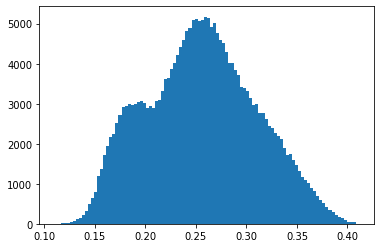

In [0]:
plt.hist(predictions,bins = 100)

In [0]:
predictions = logreg.predict_proba(X_train)[:, 1]
predictions_log = np.where(predictions <= 0.5,0,1)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm=confusion_matrix(y_train,predictions_log)
cm,accuracy_score(y_train,predictions_log)

(array([[211943,      0],
        [ 18690,      0]]), 0.9189621606621776)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_train,predictions_log)

(array([0.96789333, 0.1608281 ]),
 array([0.65468705, 0.75292476]),
 array([0.78106113, 0.26504203]),
 array([211999,  18634]))

In [0]:
np.where(y_train == 0, 1,0).mean(),y_train.mean()

(0.9192049706676841, 0.08079502933231585)

In [0]:
predictions_test = logreg.predict_proba(X_test)[:, 1]
predictions_log_test = np.where(predictions_test < 0.5,0,1)

In [0]:
np.where(y_test == 0, 1,0).mean(),y_test.mean()

(0.9194698093082546, 0.08053019069174536)

In [0]:
confusion_matrix(y_test,predictions_log_test),accuracy_score(y_test,predictions_log_test)

(array([[46115, 24572],
        [ 1585,  4606]]), 0.6597596191368141)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions_log_test)

In [0]:
from sklearn import svm

clf = svm.SVC(kernel="rbf")
clf.fit(X_train,y_train)

In [0]:
predictions_svm=clf.predict(X_test)
predictions_svm_test = np.where(predictions_svm < 0,0,1)
confusion_matrix(y_test,predictions_svm_test),accuracy_score(y_test,predictions_svm_test)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions_svm_test)

In [0]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1,max_depth=100, n_jobs = -1, verbose = 1)
rf.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    2.9s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=1,
                       warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
rf_predictions=rf.predict(X_test)
predictions_rf_test = np.where(rf_predictions <= 0.5,0,1)
confusion_matrix(y_test,predictions_rf_test),accuracy_score(y_test,predictions_rf_test)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.7s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.9s
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:    6.7s
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed:   12.0s
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed:   18.9s
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed:   26.8s
[Parallel(n_jobs=4)]: Done 2000 out of 2000 | elapsed:   30.0s finished


(array([[70684,     3],
        [ 6186,     5]]), 0.9194958245531881)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
rf_predictions=rf.predict(X_test)
predictions_rf_test = np.where(rf_predictions <= 0.5,0,1)
confusion_matrix(y_test,predictions_rf_test),accuracy_score(y_test,predictions_rf_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


(array([[64890,  5797],
        [ 5266,   925]]), 0.856096672650173)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions_rf_test)

(array([0.92493871, 0.13760785]),
 array([0.91799058, 0.14941043]),
 array([0.92145155, 0.14326648]),
 array([70687,  6191]))

In [0]:
import lightgbm as lgb
lgb_gbm = lgb.LGBMClassifier(n_estimators=10000, objective = 'binary', boosting_type='goss',
                                   class_weight = 'balanced', learning_rate = 0.05, 
                                   reg_alpha = 0.1, reg_lambda = 0.1, n_jobs = -1, random_state = 50)

In [0]:
lgb_gbm.fit(X_train, y_train, eval_metric = 'auc')

LGBMClassifier(boosting_type='goss', class_weight='balanced',
               colsample_bytree=1.0, importance_type='split',
               learning_rate=0.05, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=10000,
               n_jobs=-1, num_leaves=31, objective='binary', random_state=50,
               reg_alpha=0.1, reg_lambda=0.1, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [0]:
from sklearn.metrics import confusion_matrix,accuracy_score
lgb_predictions=lgb_gbm.predict(X_test)
predictions_lgb_test = np.where(lgb_predictions <= 0.5,0,1)
confusion_matrix(y_test,predictions_lgb_test),accuracy_score(y_test,predictions_lgb_test)

(array([[68673,  2014],
        [ 5065,  1126]]), 0.9079190405577668)

In [0]:
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,predictions_lgb_test)

(array([0.93131086, 0.35859873]),
 array([0.9715082 , 0.18187692]),
 array([0.95098494, 0.24134605]),
 array([70687,  6191]))